# Приветствие
Доброго времени суток!
Меня зовут Голубев Артём Алексеевич.
Ниже представлена работа по домашнему заданию 3.
Приятного времяпровождения! :)


# Задание
## ВАМ НЕОБХОДИМО:
*	Ознакомиться с содержанием демонстрационных блокнотов.
*	Создать новый блокнот, импортировать необходимые библиотеки (не обязательно копировать все, только нужные функции и/или классы).
*	Выполнить следующие задания (каждое задание под отдельным заголовком #).
 
### 1.  Для синтетических данных:
*	Сгенерируйте данные, распределенные как знак Инь-Ян и концентрические круги (чтобы было веселей, накатите больше шума).
*	Проверьте различные степени полиномов исходных данных и различные типы регуляризации для достижения наилучшего качества классификации. Проанализируйте метрики классификации.
*	Должно присутствовать сравнение как минимум двух моделей для каждого типа данных.
*	Для удобства можете создать новые функции. 
 
### 2.  Для набора данных Cars Moldova:
*	Скачайте набор данных Cars Moldova (сразу очищенных от дубликатов и выбросов, лучше с добавленными признаками из «Задания 1») :
*	 Используйте модель логистической регрессии для предсказания типа трансмиссии автомобилей на вторичном рынке Молдавии. Оцените модель на отложенной выборке. Проанализируйте метрики классификации.
*	Оцените влияние разных типов предварительной обработки на результат (использование стандартизации, нормализации или степенного преобразования для числовых признаков).


# Импорты

## Библиотеки

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
import sklearn.metrics 



## Классы

In [2]:
class LinearRegression():
    def __init__(self, 
                 learning_rate = 0.5, 
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000,
                 n_batches    = None,
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)
        
        self.n_batches = n_batches
        
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
                self.weights = np.append(self.bias,self.weights)
    
    #---------------------------------
    def forward(self, X):
        return np.dot(X, self.weights)
    
    #---------------------------------
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size
    
    #---------------------------------
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size
    
    #---------------------------------
    def update(self):    
        return self.weights - self.lr*self.grad
    
    #---------------------------------
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)
    
    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat.squeeze()
    
    #---------------------------------
    def score(self, X, y):        
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))
    
    #---------------------------------
    def fit(self, X, y):

        np.random.seed(self.seed)

        if self.weights is None:
            self.weights = self.init(X.shape[1])
        
        if self.bias is None: 
            self.bias    = self.init(1)
        
        if self.weights.size == X.shape[1]:
            self.weights = np.append(self.bias,self.weights)
        
        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:            
            self.batch_size = y.size
            
        if self.n_batches is None:
            self.n_batches = y.size//self.batch_size
            
        for i in range(self.epochs): 
            loss = 0
            for cnt,(x_batch, y_batch) in enumerate(self.load_batch(X,y)): 

                yhat         = self.forward(x_batch)
                self.grad    = self.grad_step(yhat,  y_batch, x_batch) 
                self.weights = self.update() 
                loss += self.loss(yhat,  y_batch)
                
                if cnt>= self.n_batches:
                    break
            self.cost[i] = loss/self.n_batches
        
        self.bias = self.weights[0]
    #---------------------------------
    def load_batch(self,X,y):
        idxs = np.arange(y.size)
        np.random.shuffle(idxs)

        for i_batch in range(0,y.size,self.batch_size):
            idx_batch = idxs[i_batch:i_batch+self.batch_size]
            x_batch   = np.take(X, idx_batch,axis=0)
            x_batch   = self.add_bias(x_batch)
            y_batch   = np.take(y, idx_batch)
            yield  x_batch, y_batch
    
    #---------------------------------
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))
    
    #---------------------------------
    def plot_cost(self, figsize = (12,6), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 24)
        plt.ylabel('Функция Потерь', fontsize = 24)
        plt.title(title, fontsize = 24)
        plt.show()
    
    #---------------------------------
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

In [3]:
class ElasticRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty = 0.0,
                 l2_penalty = 0.0,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 n_batches    = None,
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         n_batches    = n_batches,
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
        
    #---------------------------------
    def loss(self,yhat, y):   
        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size
        return np.square(yhat - y).mean() + l1_term + l2_term
                  
    #---------------------------------
    def update(self):    
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + np.sign(self.weights)*self.l1_penalty  + l2_term)

In [4]:
_EPS_ = 1e-6

In [5]:
class LogisticRegression(ElasticRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty    = 0.0,
                 l2_penalty    = 0.0,
                 epochs        = 100, 
                 weights       = None, 
                 bias          = None, 
                 threshold     = 0.5,
                 batch_size    = 1000, 
                 n_batches     = None,
                 random_state  = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         n_batches    = n_batches,
                         random_state = random_state,
                         l1_penalty = l1_penalty,
                         l2_penalty = l2_penalty)       
        self.learning_rate = learning_rate/2
        self.threshold = threshold
    #---------------------------------    
    def loss(self,yhat, y):
        
        l1_term = self.l1_penalty*np.sum(self.weights[1:])
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        
        return -(y*np.log(yhat  + _EPS_)+(1 - y)*np.log(1 - yhat  + _EPS_)).mean()\
            + l1_term+ l2_term   
    #---------------------------------
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))     
    #---------------------------------
    def forward(self, X):     
        return self.sigmoid(np.dot(X, self.weights))   
    #---------------------------------
    def to_class(self,logit):
        return (logit>=self.threshold)*1   
    #---------------------------------
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return self.to_class(yhat)

    #---------------------------------
    def predict_prob(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat 
    #---------------------------------
    def score(self, X, y):
        yhat  = self.predict(X)
        return sum((yhat==y)*1)/y.size
    #---------------------------------
    def plot_desicion_function(self,X,y,figsize = (12,6),
                               marker = 'o',colors =("#FF0000", '#0000FF'),
                               alpha=0.7, s = 150, poly = False, order = 2):
        plt.figure(figsize = figsize)
        cm_bright = ListedColormap(colors)
        plt.scatter(X[:, 0], X[:, 1],marker = marker, c=y, cmap=cm_bright,s = s, alpha =alpha);
        h =  (X[:, 0].max() - X[:, 0].min())/50
        x_min, x_max = X[:, 0].min()-0.5 , X[:, 0].max()+0.5
        y_min, y_max = X[:, 1].min()-0.5 , X[:, 1].max()+0.5    
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        if poly:
            Z = self.predict_prob(to_polynom(np.c_[xx.ravel(), yy.ravel()],order))-0.5
        else:
            Z = self.predict_prob(np.c_[xx.ravel(), yy.ravel()])-0.5
        cm = plt.cm.RdBu
        Z = Z.reshape(xx.shape) 
        plt.contourf(xx, yy, Z, cmap=cm, alpha=.5)
        plt.xticks([],[])
        plt.yticks([],[])
        plt.tight_layout()
    #---------------------------------
    def classification_report(self, X,y):
        tp = 0 # true_positives
        tn = 0 # true_negatives
        fp = 0 # false_positives
        fn = 0 # false_negatives
        
        yhat  = self.predict(X)
        total = yhat.size
        n= sum(yhat==0)
        p = sum(yhat==1)
        
        for yhati,yi in zip(yhat,y):
            if yi == 1 and yhati == 1:
                tp += 1
            elif yi == 0 and yhati == 0:
                tn += 1
            elif yi == 1 and yhati == 0:
                fn += 1
            elif yi == 0 and yhati == 1:
                fp += 1

        print('True Positives:%.4f'%(tp/p), end = '\t')
        print('True Negatives:%.4f'%(tn/n))
        print('False Positives:%.4f'%(fp/p), end = '\t')
        print('False Negatives:%.4f'%(fn/n))
        print('Accuracy:%.4f'% ((tp + tn) / total))
        print('Recall:%.4f'% (tp / (tp + fn)), end = '\t')
        print('Precision:%.4f'%(tp / (tp + fp)))
        print('f1 measure:%.4f'%(tp / (tp + 0.5*(fp+fn))))

## Функции

In [6]:
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    X, y = ds

    cm_bright = ListedColormap(colors)
    ax.set_title(name, fontsize = 30)
    if facecolor:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   alpha =alpha)
    else:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   facecolor = 'None',
                   alpha =alpha)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [7]:
def make_binary_clf(N = 150, 
                    method = 'line',
                    noises = 0.15,
                    random_state = 42):

    if random_state: rng = np.random.RandomState(seed = random_state)
    
    if method == 'line' or method is None:
        X, y = make_classification(n_samples=N, n_features=2,
                                   n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1, class_sep=2,
                                   random_state=random_state)
        X += np.random.randn(*X.shape) *noises
        out = (X, y)
    
    elif method == 'moons':
        X, y = make_moons(n_samples=N, noise=noises, 
                          random_state=random_state)
    
    elif method == 'circles':    
        X, y = make_circles(n_samples=N, noise=noises, factor=0.5,
                            random_state=random_state )
                            
    return X,y

In [8]:
def to_polynom(X, order = 2):
    order_range = range(2, order+1,1)
    out = np.copy(X) 
    for i in order_range:
        out = np.hstack([out, np.power(X,i)])
    return out

# 1. Синтетические данные

## 1.1. Генерируем данные

Сгенерируйте данные, распределенные как знак Инь-Ян и концентрические круги (чтобы было веселей, накатите больше шума).

### 1.1.1. Инь-Ян

Задаю число частиц N = 300, а шумы увеличиваю до 0.2. Получилось ну оочень шумно:

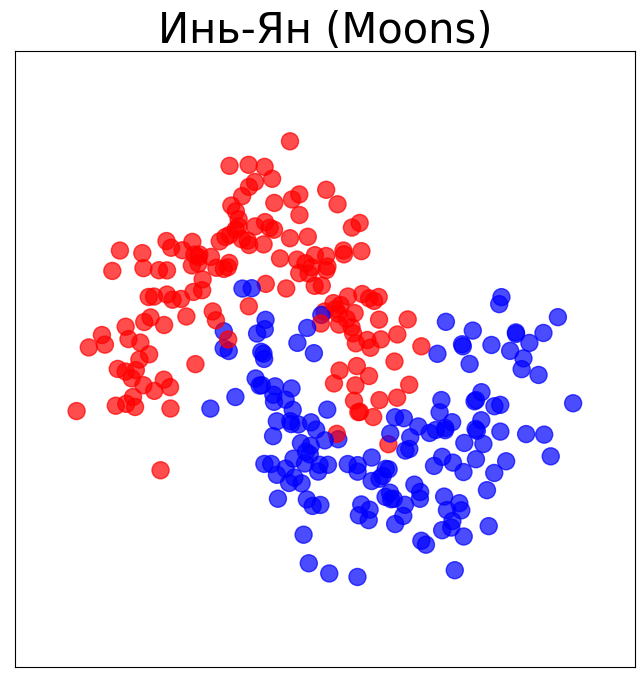

In [9]:
moons = make_binary_clf(method = 'moons', noises=0.2, N=300)

fig=plt.figure(figsize=(8,8))
ax = plt.subplot()
plot_data(ax, moons,
          'Инь-Ян (Moons)')

### 1.1.2. Концентрические круги

Задаю те же параметры (noises=0.2, N=300) уже для концентрических кругов. Так и правда получилось веселее)))

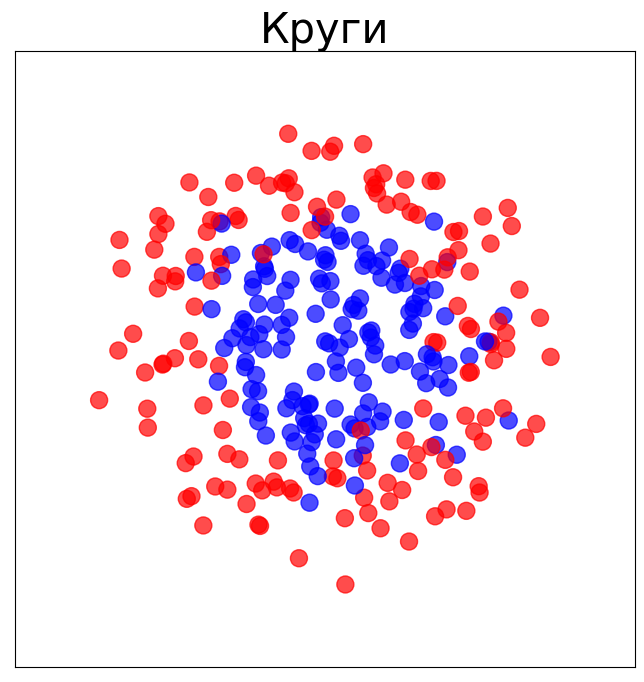

In [10]:
circles = make_binary_clf(method = 'circles', noises=0.2, N=300)

fig=plt.figure(figsize=(8,8))
ax = plt.subplot()
plot_data(ax, circles,
          'Круги')

## 1.2. Проводим классификацию на синтетических данных

Проверьте различные степени полиномов исходных данных и различные типы регуляризации для достижения наилучшего качества классификации. Проанализируйте метрики классификации.

### 1.2.1. Инь-Ян

Сохраним данные в переменные **Х** и **y**, а также создадим тренировочную выборку:

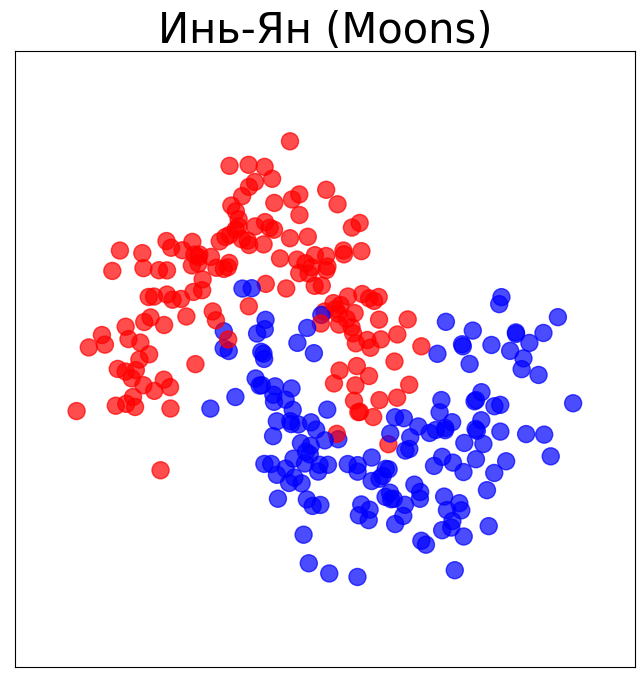

In [11]:
X,y = moons
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig=plt.figure(figsize=(8,8))
ax = plt.subplot()
plot_data(ax, (X,y),
          'Инь-Ян (Moons)')

Проведем тестирование без регуляризации для линейного разделения:

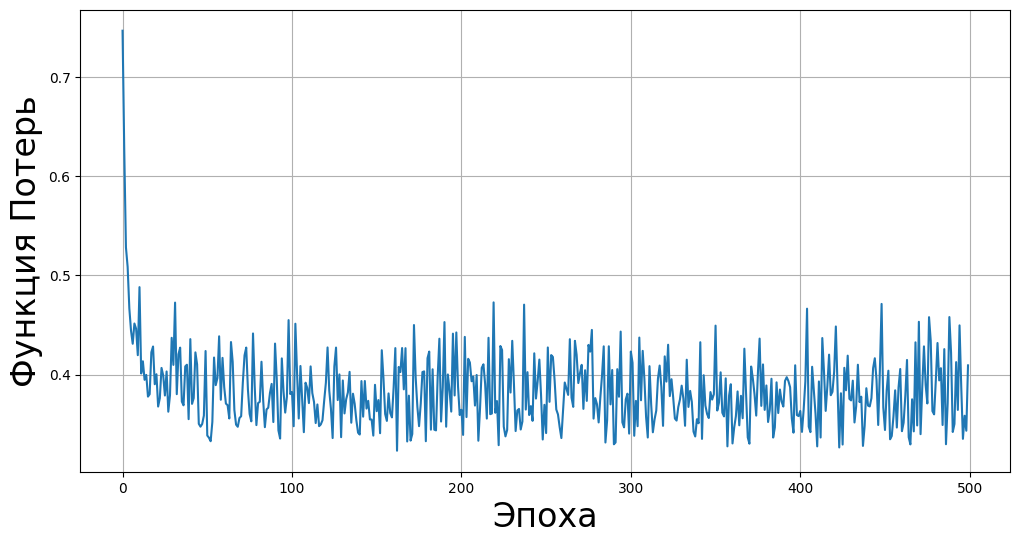

0.9 0.8666666666666667
True Positives:0.9057	True Negatives:0.8919
False Positives:0.0943	False Negatives:0.1081
Accuracy:0.9000
Recall:0.9231	Precision:0.9057
f1 measure:0.9143


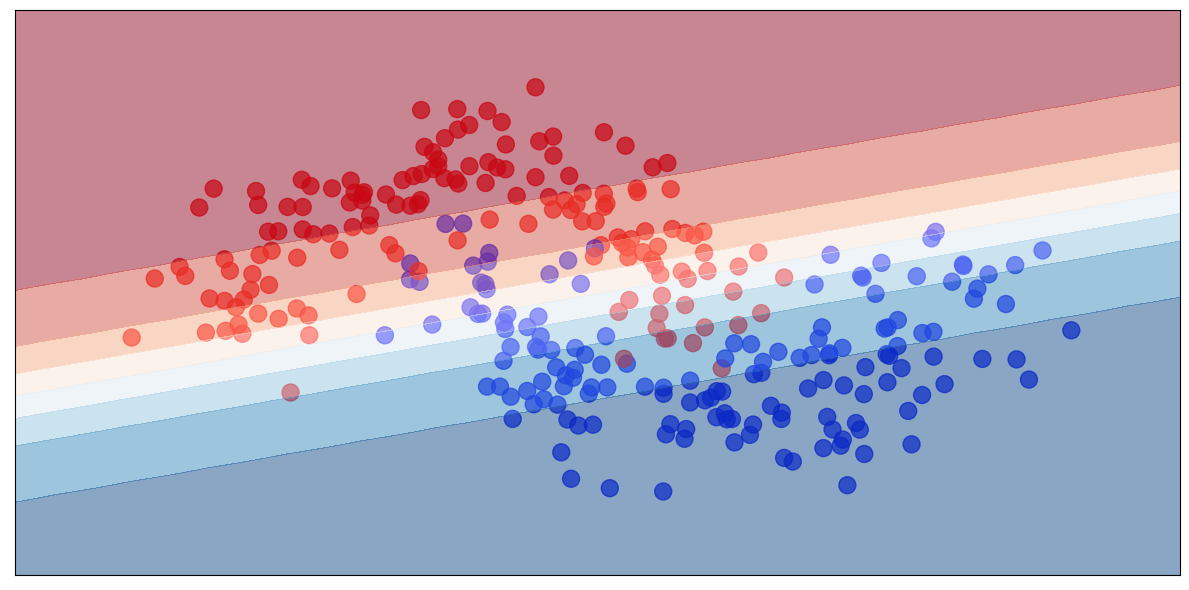

In [12]:
regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,batch_size=50,
                          )
regr.fit(X_train, y_train)

regr.plot_cost()
print(regr.score(X_test, y_test), regr.score(X_train, y_train))
regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X,y)

В целом справляется относительно неплохо, однако есть над чем работать. На тестовых данных справляется ожидаемо лучше, чем на тренировочных. Полнота немного выше точности, что говорит о небольшом количестве пропусков. Посмотрим, как справятся степени.

#### Степени

Проверим различные степени. Для степени 2 классификация происходит ровно так же, как и в случае линейной зависимости. Так как парабола не имеет точек перегиба (надеюсь, с терминами я не накосячил), а линия разделения нашего набора данных явно должна их иметь, то компонента x**2 зануляется и зависимость приходит обратно к линейному виду:

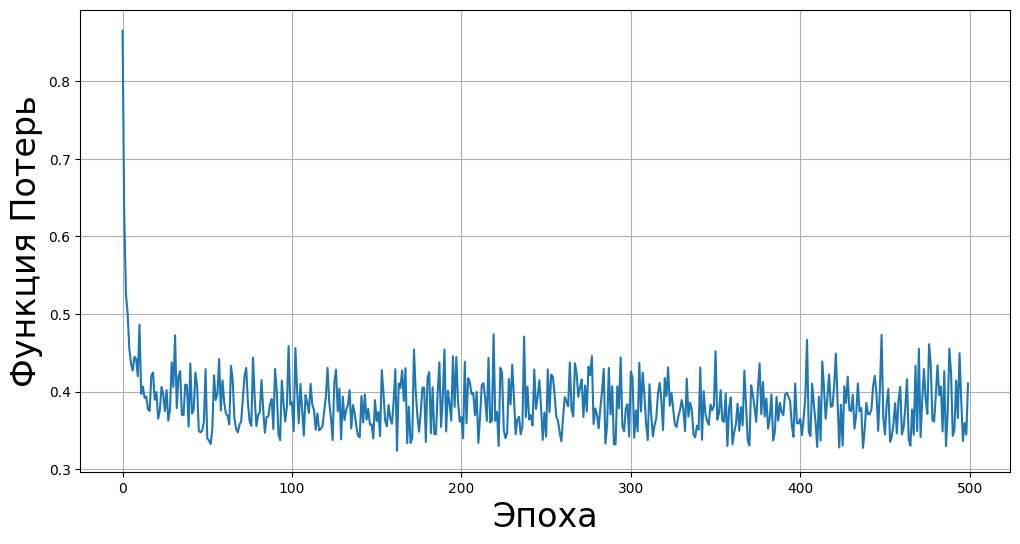

0.9 0.8666666666666667
True Positives:0.9057	True Negatives:0.8919
False Positives:0.0943	False Negatives:0.1081
Accuracy:0.9000
Recall:0.9231	Precision:0.9057
f1 measure:0.9143


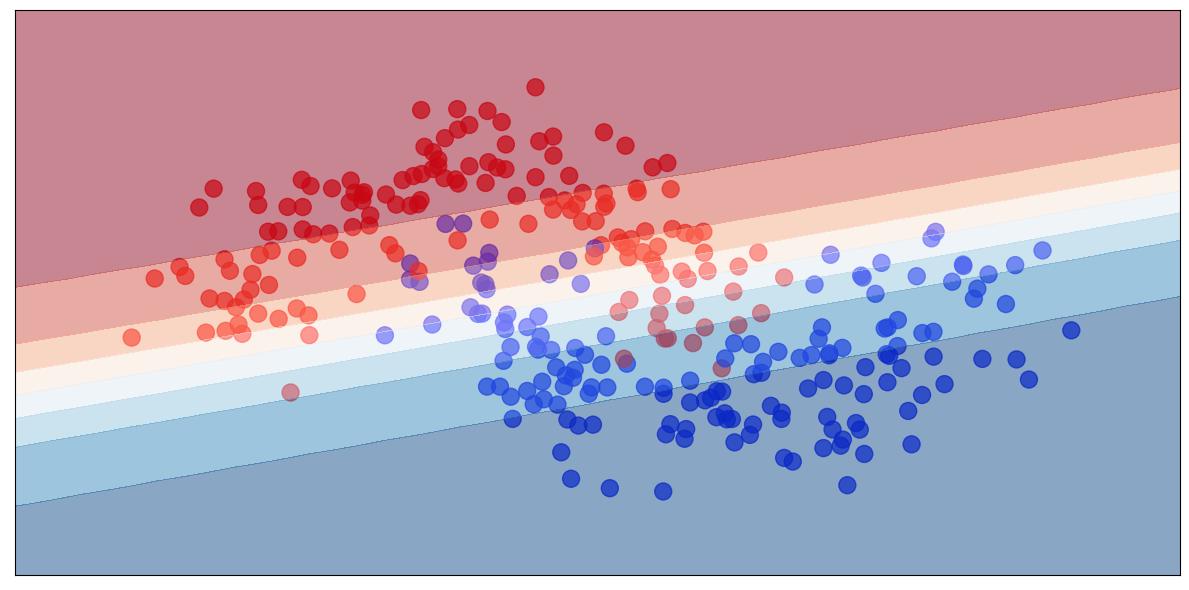

In [13]:
X,y = moons
order = 2
X_poly = to_polynom(X, order = order)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,batch_size=50,
                          )
regr.fit(X_train, y_train)

regr.plot_cost()
print(regr.score(X_test, y_test), regr.score(X_train, y_train))
regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X_poly,y,
                            poly = True, order = order)

Начиная со степени 3, число точек перегиба становится ненулевым, отчего и классификация наших данных делает уже гораздо бОльшие успехи:

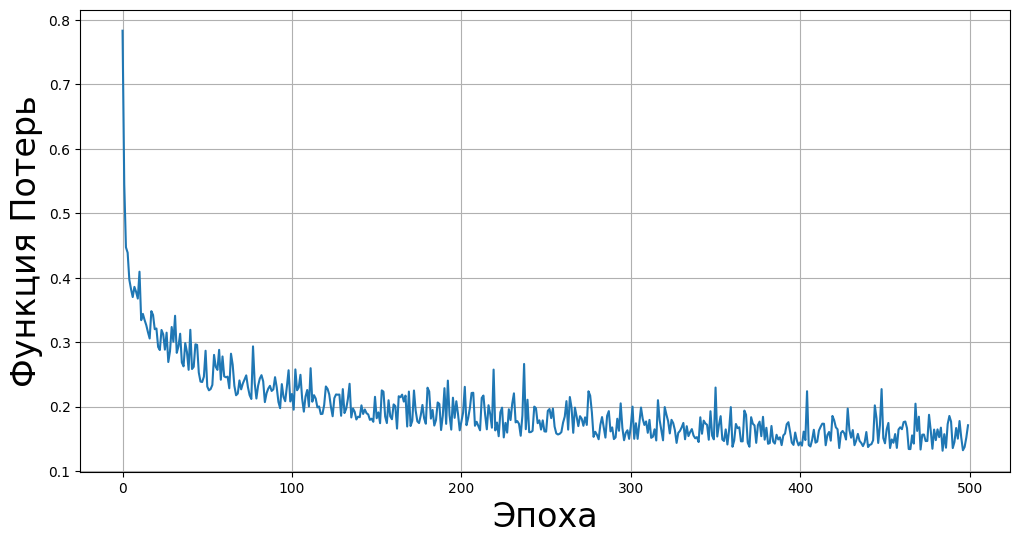

0.9666666666666667 0.9666666666666667
True Positives:0.9804	True Negatives:0.9487
False Positives:0.0196	False Negatives:0.0513
Accuracy:0.9667
Recall:0.9615	Precision:0.9804
f1 measure:0.9709


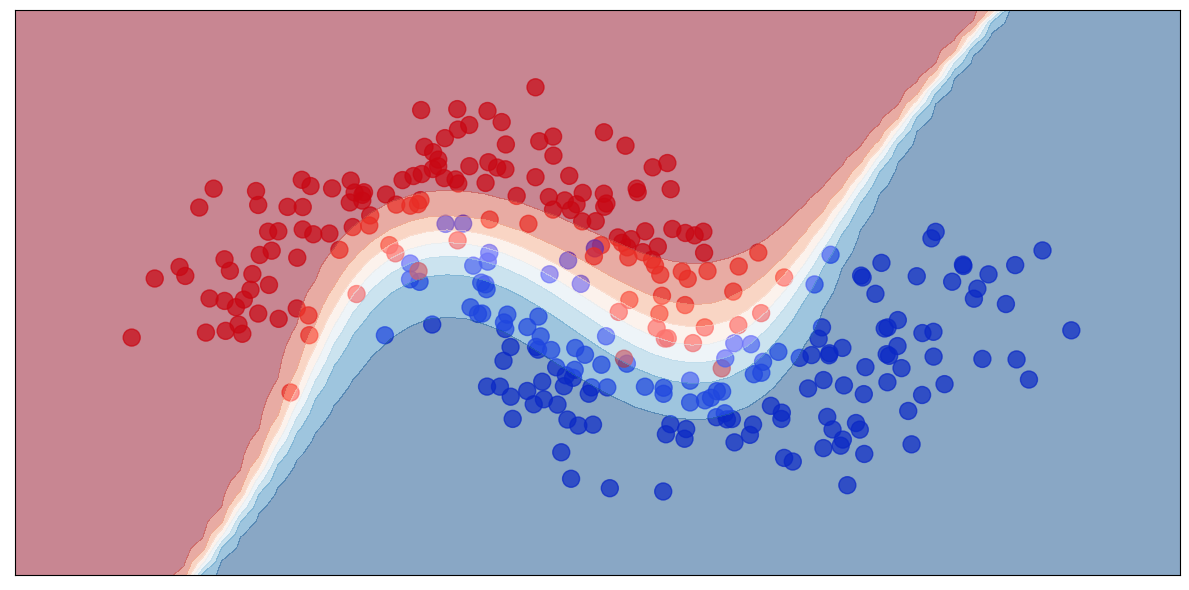

In [14]:
X,y = moons
order = 3
X_poly = to_polynom(X, order = order)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,batch_size=50,
                          )
regr.fit(X_train, y_train)

regr.plot_cost()
print(regr.score(X_test, y_test), regr.score(X_train, y_train))
regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X_poly,y,
                            poly = True, order = order)

Видим, что все метрики классификации улучшились по сравнению с линейным разбиением. Инетересно, что параметр Accuracy одинаковый как для тестовой, так и для тренировочной выборки. При этом точность данных начинает превосходить полноту, но и та, и другая метрики имеют очень высокие значения.

#### Регуляризации

Проверим действие регуляризаций на линейное разделение.
Видим, что даже небольшая L2 регуляризация заметно ухудшает работу классификатора:

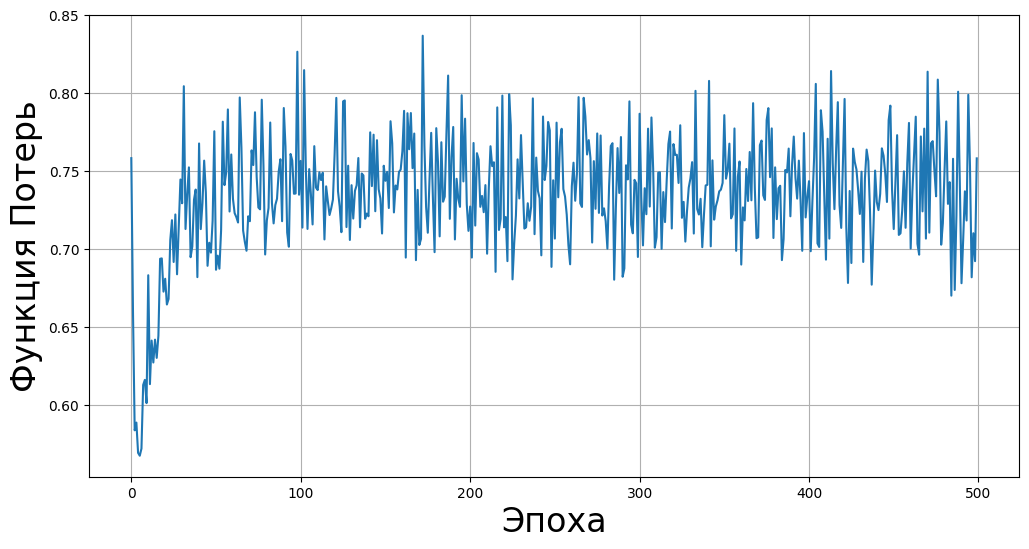

0.8888888888888888 0.8380952380952381
True Positives:0.8889	True Negatives:0.8889
False Positives:0.1111	False Negatives:0.1111
Accuracy:0.8889
Recall:0.9231	Precision:0.8889
f1 measure:0.9057


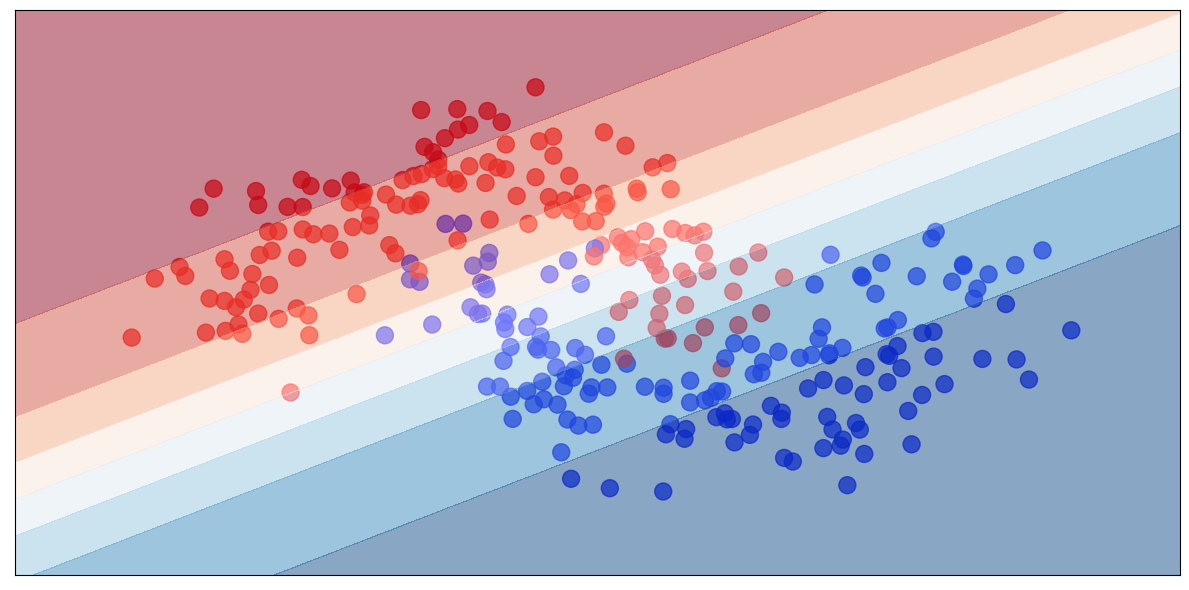

In [15]:
X,y = moons
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,batch_size=50,
                          l2_penalty    = 0.05,
                          )
regr.fit(X_train, y_train)

regr.plot_cost()
print(regr.score(X_test, y_test), regr.score(X_train, y_train))
regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X,y)

Кроме того, видим более значительную разницу между тестовой и тренировочной выборками (в пользу тестовой выборки).

L1 регуляризация справляется чуть лучше, хотя и не даёт значительного преимущества над нерегуляризованной классификацией:

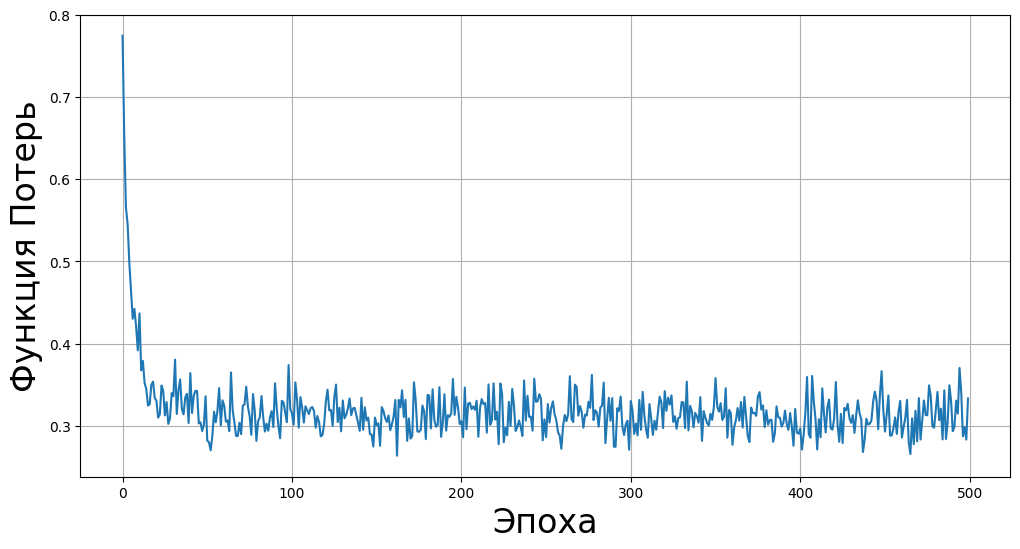

0.9 0.8428571428571429
True Positives:0.9216	True Negatives:0.8718
False Positives:0.0784	False Negatives:0.1282
Accuracy:0.9000
Recall:0.9038	Precision:0.9216
f1 measure:0.9126


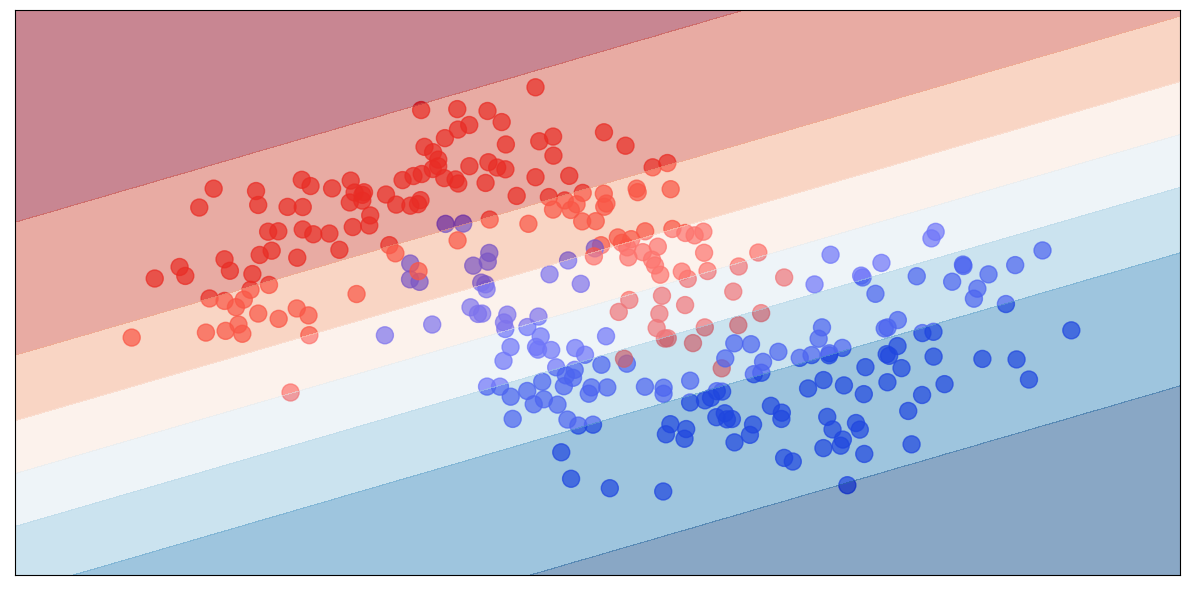

In [16]:
X,y = moons
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,batch_size=50,
                          l1_penalty    = 0.1,
                          )
regr.fit(X_train, y_train)
regr.plot_cost()

print(regr.score(X_test, y_test), regr.score(X_train, y_train))
regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X,y)

Теперь рассмотрим регуляризации для полиномиального разбиения. При использовании даже небольшого L2 ограничения функция потерь начинает улетать в космос, хотя метрики классификации ухудшаются незначительно. Разбиение становится совсем отличным от первоначального:

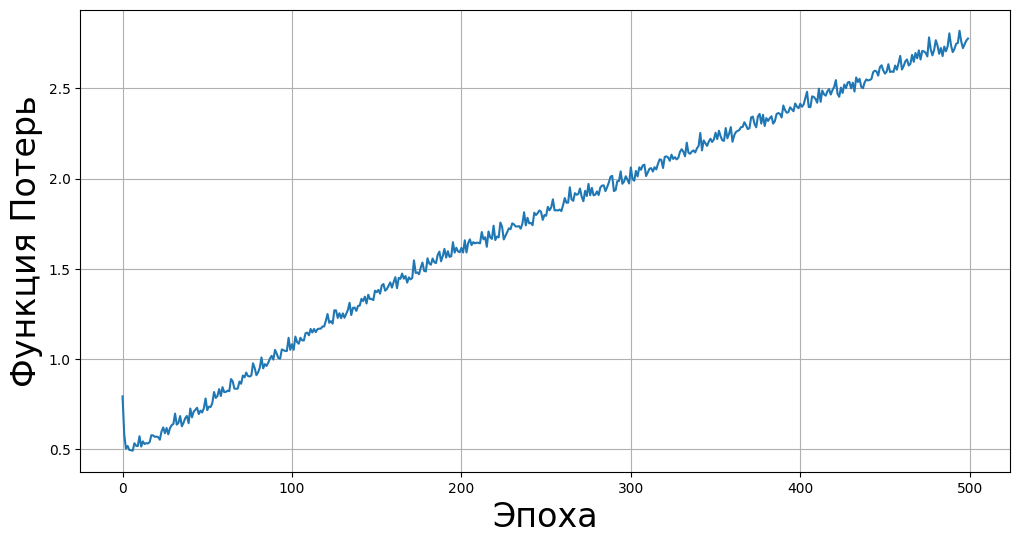

0.9 0.9
True Positives:0.9057	True Negatives:0.8919
False Positives:0.0943	False Negatives:0.1081
Accuracy:0.9000
Recall:0.9231	Precision:0.9057
f1 measure:0.9143


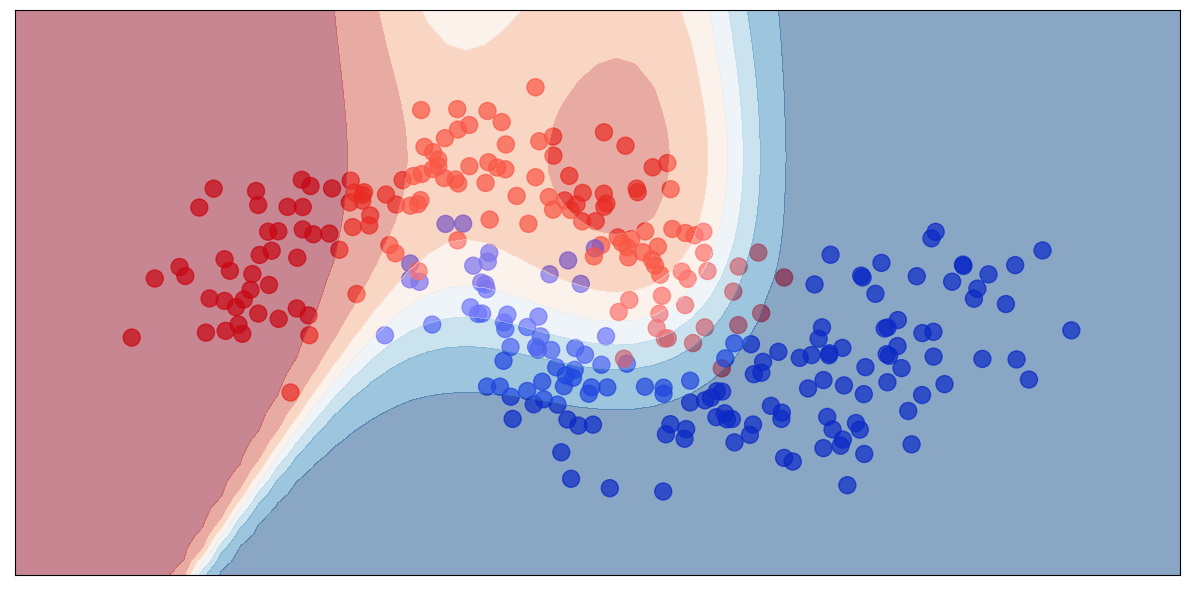

In [17]:
X,y = moons
order = 3
X_poly = to_polynom(X, order = order)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,batch_size=50,
                          l2_penalty = 0.05,
                          )
regr.fit(X_train, y_train)

regr.plot_cost()
print(regr.score(X_test, y_test), regr.score(X_train, y_train))
regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X_poly,y,
                            poly = True, order = order)

L1 регуляризация заметно ухудшает метрики классификации. Кривая разделения становится менее "резкокривящейся", отчего случается больше ошибок:

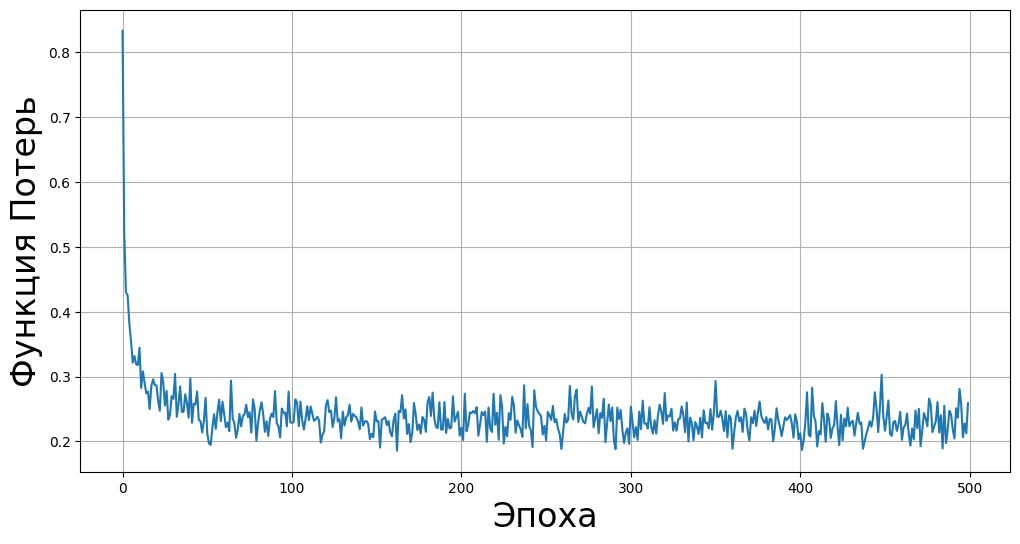

0.8888888888888888 0.8666666666666667
True Positives:0.9200	True Negatives:0.8500
False Positives:0.0800	False Negatives:0.1500
Accuracy:0.8889
Recall:0.8846	Precision:0.9200
f1 measure:0.9020


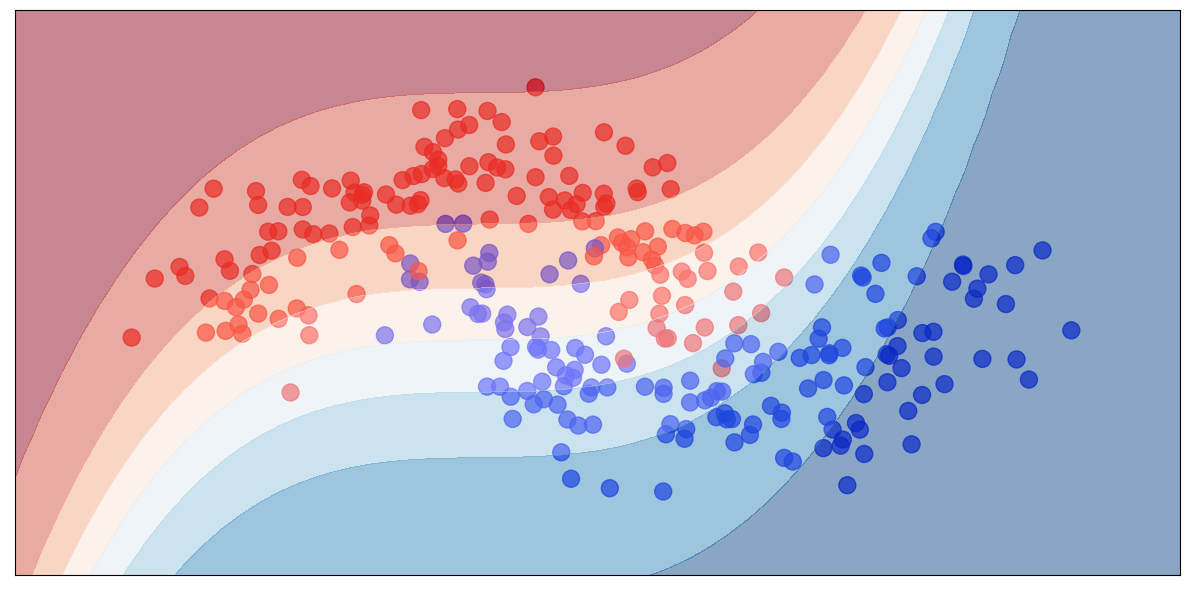

In [18]:
X,y = moons
order = 3
X_poly = to_polynom(X, order = order)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,batch_size=50,
                          l1_penalty = 0.1,
                          )
regr.fit(X_train, y_train)

regr.plot_cost()
print(regr.score(X_test, y_test), regr.score(X_train, y_train))
regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X_poly,y,
                            poly = True, order = order)

#### Выводы

* В случае Инь-Яна наилучшее разделение получилось при использовании полинома 3 степени, а регуляризации скорее ухудшали общую ситуацию и метрики.
* Как правило, модель показывает более высокие показатели на тестовой выборке по сравнению с тренировочной.

### 1.2.2. Круги

Сохраним данные в переменные **Х** и **y**, а также создадим тренировочную выборку:

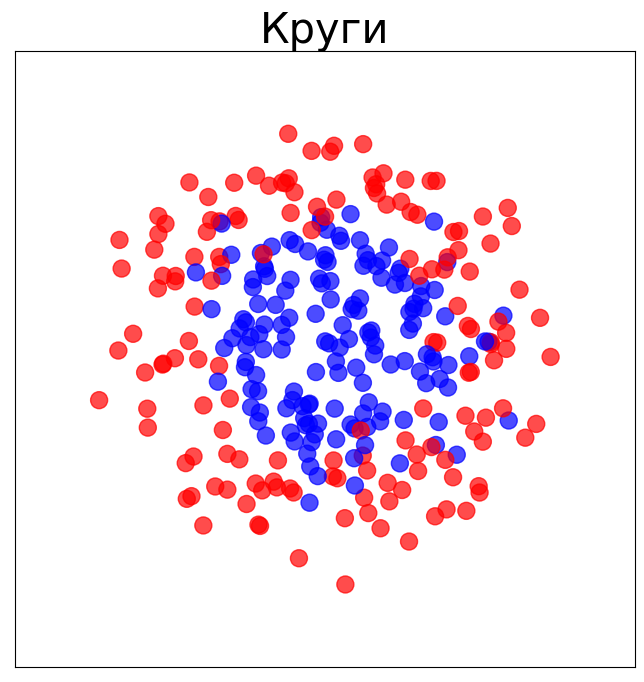

In [19]:
X,y = circles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

fig=plt.figure(figsize=(8,8))
ax = plt.subplot()
plot_data(ax, (X,y),
          'Круги')

Проведем тестирование без регуляризации для линейного разделения:

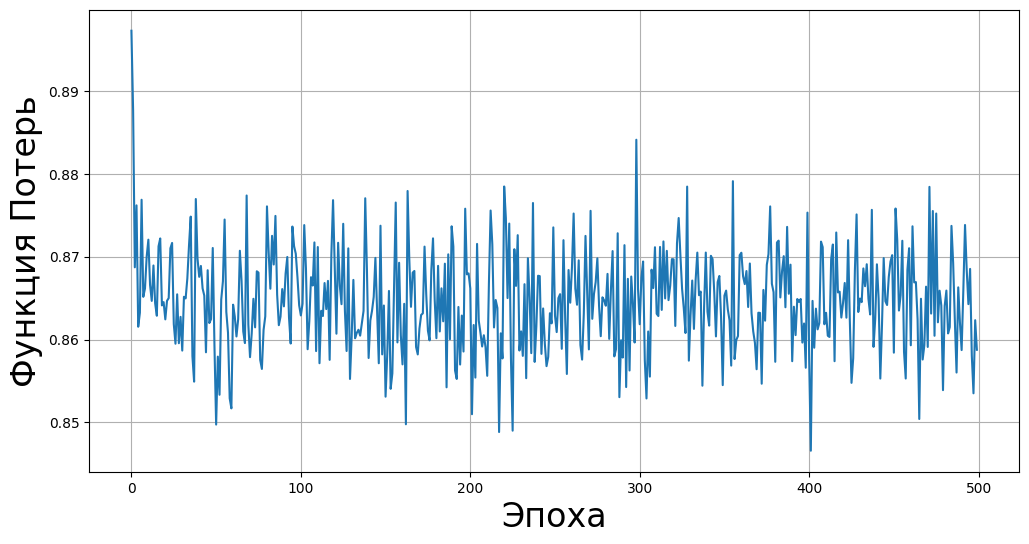

0.4 0.5333333333333333
True Positives:0.0000	True Negatives:0.4091
False Positives:1.0000	False Negatives:0.5909
Accuracy:0.4000
Recall:0.0000	Precision:0.0000
f1 measure:0.0000


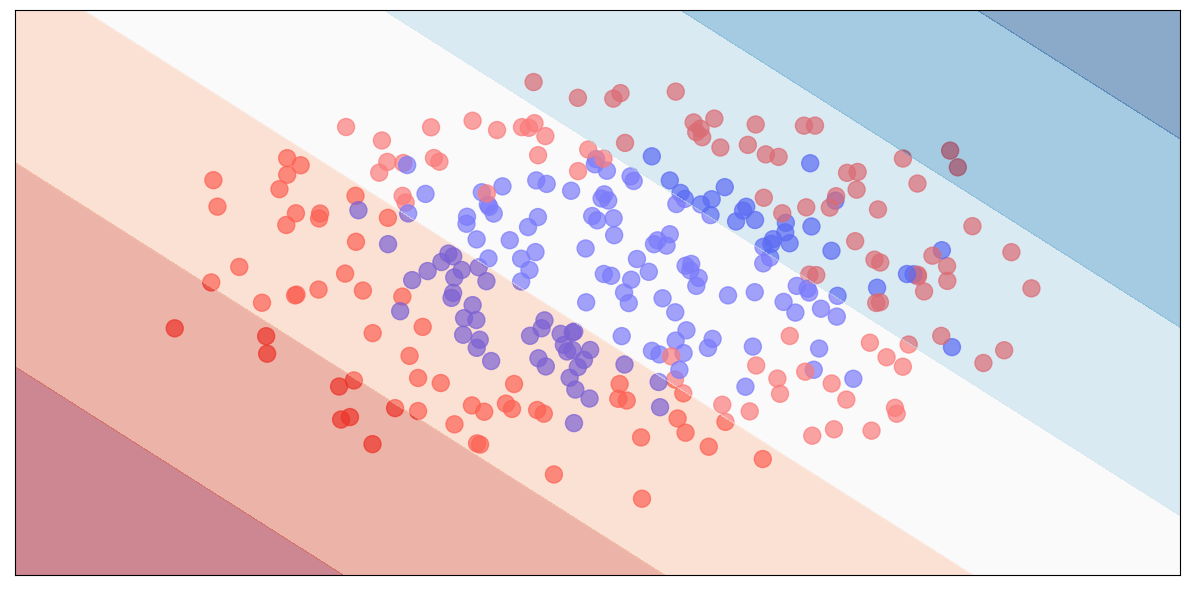

In [20]:
regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,batch_size=50,
                          )
regr.fit(X_train, y_train)

regr.plot_cost()
print(regr.score(X_test, y_test), regr.score(X_train, y_train))
regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X,y)

Ожидаемо получаем лажу, ибо линейный классификатор не очень хорошо справляется с кругами. Интересно, что здесь поменялась ситуация с точностью тестовой и тренировочной выборки, теперь лучше работает тренировочная выборка :)

#### Степени

Здесь не будем изображать из себя любителей высоких степеней и просто используем добрую и понятную степень 2. Так работает оно значительно лучше линейного разбиения, хотя и из-за зашумленности данных метрики классификации несколько уменьшены:

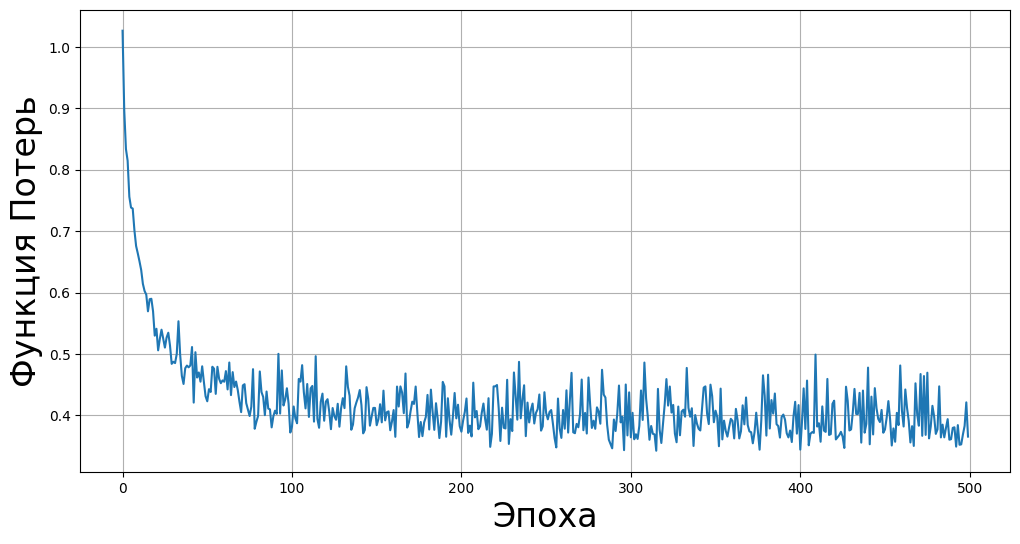

0.9222222222222223 0.8666666666666667
True Positives:0.9592	True Negatives:0.8780
False Positives:0.0408	False Negatives:0.1220
Accuracy:0.9222
Recall:0.9038	Precision:0.9592
f1 measure:0.9307


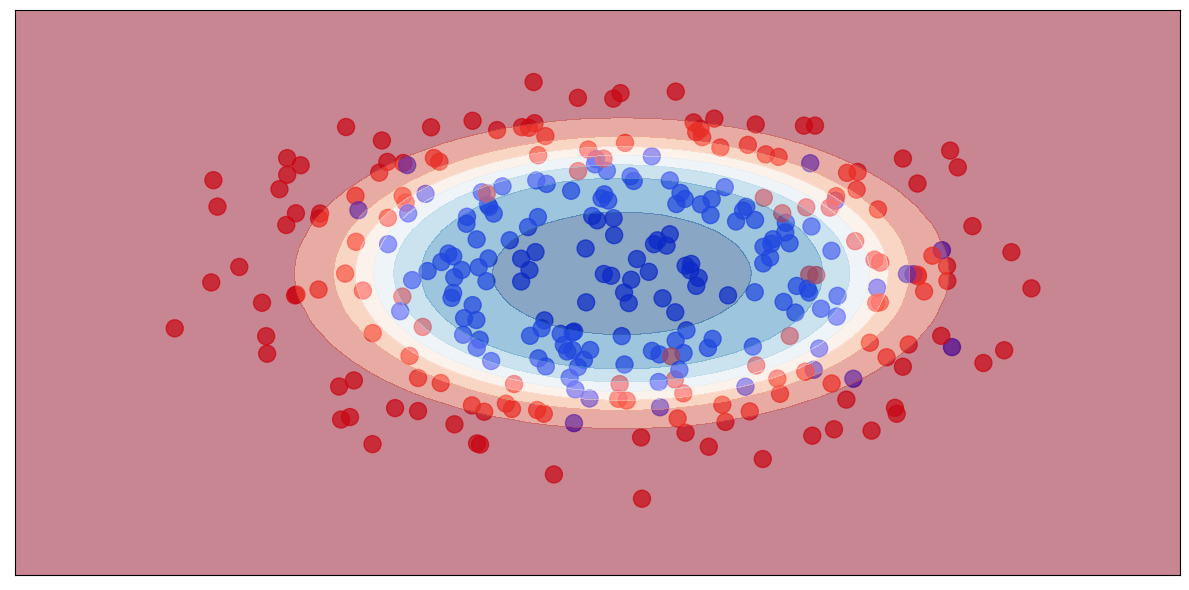

In [21]:
X,y = circles
order = 2
X_poly = to_polynom(X, order = order)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,batch_size=50,
                          )
regr.fit(X_train, y_train)

regr.plot_cost()
print(regr.score(X_test, y_test), regr.score(X_train, y_train))
regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X_poly,y,
                            poly = True, order = order)

Здесь тестовые данные снова вырываются вперед. Кроме того, точность начинает значительно превышать полноту, а значит классификатор совершает чуть больше пропусков, но при этом *True Positives* определяет очень точно.

Ладно, ради интереса попробуем более высокие степени и посмотрим, что же нам сможет выдать наш замечательный классификатор. На третьей степени разделяющая захватила большее пространство справа, при этом несколько ухудшив метрику для тестовой группы и улучшив для тренировочных значений:

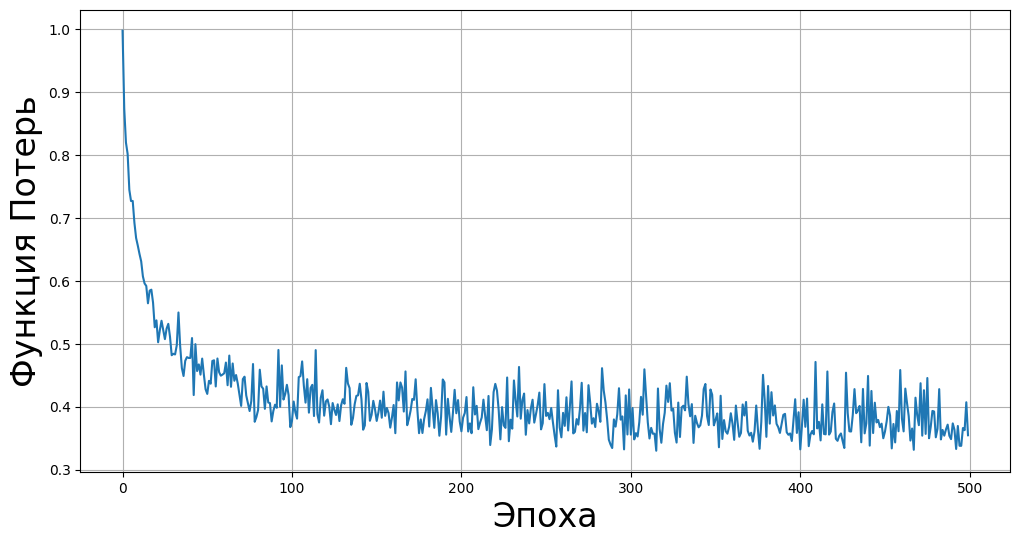

0.9111111111111111 0.8761904761904762
True Positives:0.9400	True Negatives:0.8750
False Positives:0.0600	False Negatives:0.1250
Accuracy:0.9111
Recall:0.9038	Precision:0.9400
f1 measure:0.9216


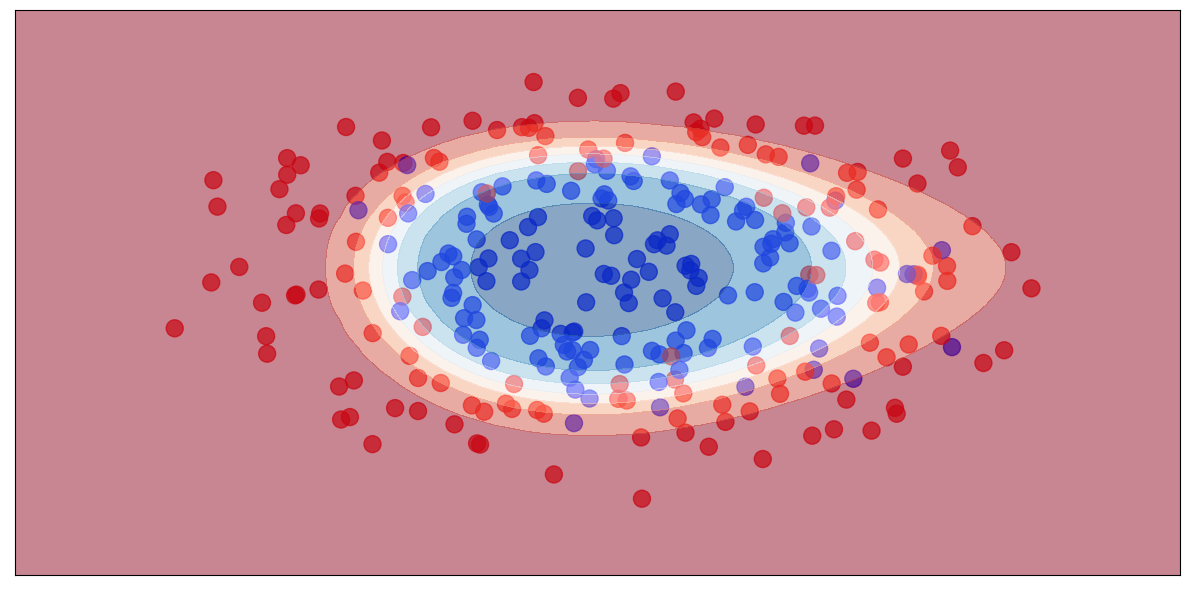

In [22]:
X,y = circles
order = 3
X_poly = to_polynom(X, order = order)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,batch_size=50,
                          )
regr.fit(X_train, y_train)

regr.plot_cost()
print(regr.score(X_test, y_test), regr.score(X_train, y_train))
regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X_poly,y,
                            poly = True, order = order)

Полнота и точность модели несколько снизились, но их соотношение осталось примерно тем же.

При использовании 15 степени мы смогли несколько улучшить оценку для тренировочных данных, однако слева появилась новая синяя область, в которую не входит ни одно значение:

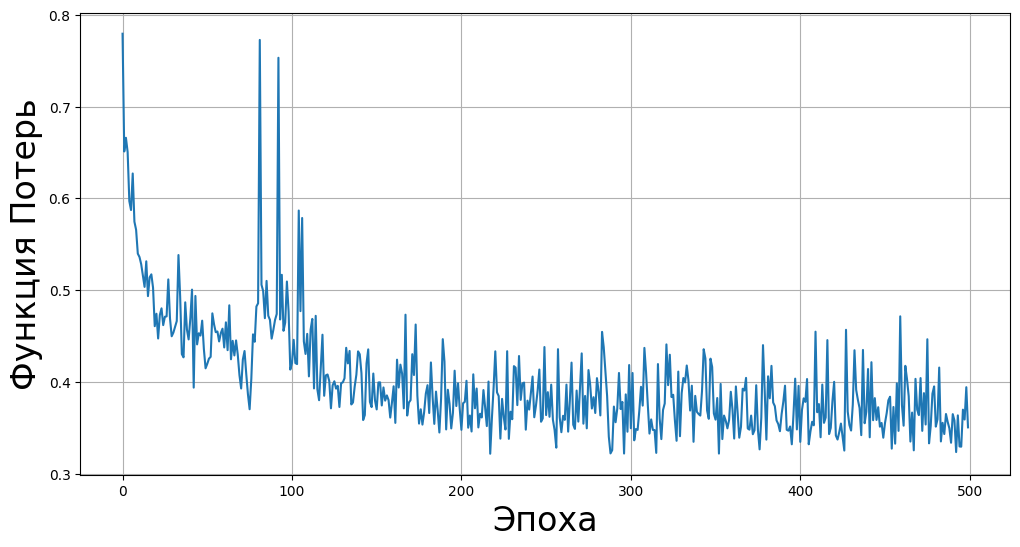

0.9 0.8809523809523809
True Positives:0.9388	True Negatives:0.8537
False Positives:0.0612	False Negatives:0.1463
Accuracy:0.9000
Recall:0.8846	Precision:0.9388
f1 measure:0.9109


C:\Users\argol\AppData\Local\Temp\ipykernel_28152\4184915714.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


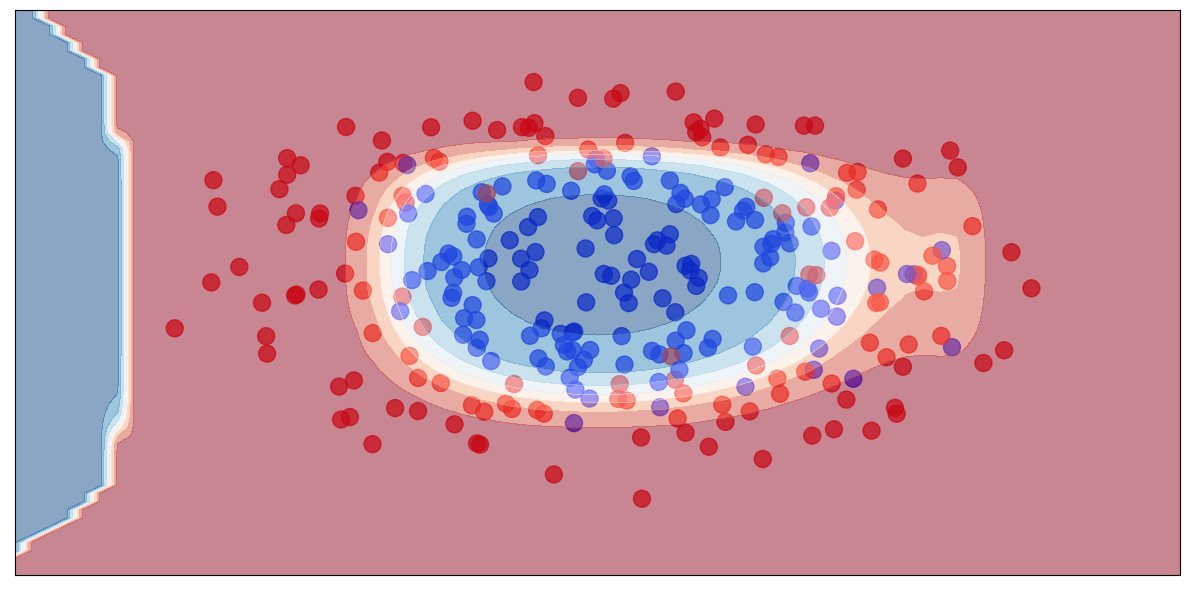

In [23]:
X,y = circles
order = 15
X_poly = to_polynom(X, order = order)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,batch_size=50,
                          )
regr.fit(X_train, y_train)

regr.plot_cost()
print(regr.score(X_test, y_test), regr.score(X_train, y_train))
regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X_poly,y,
                            poly = True, order = order)

#### Регуляризации

Проверим действие регуляризаций на линейное разделение.
Здесь принципиально ничего не меняется, однако в при использовании **regr.classification_report(X_test, y_test)** вылезает ошибка, поэтому данная строка закомментирована:

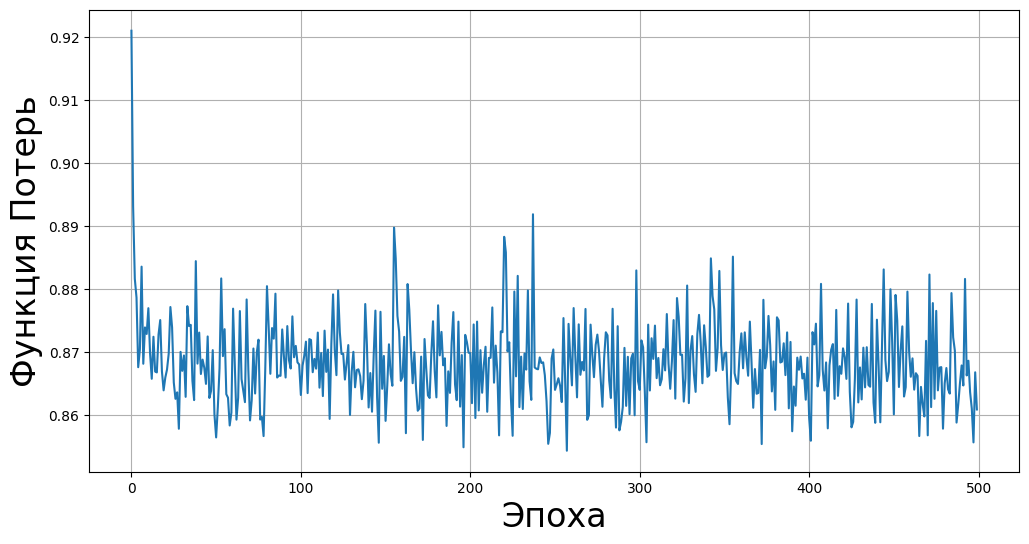

0.4222222222222222 0.5333333333333333


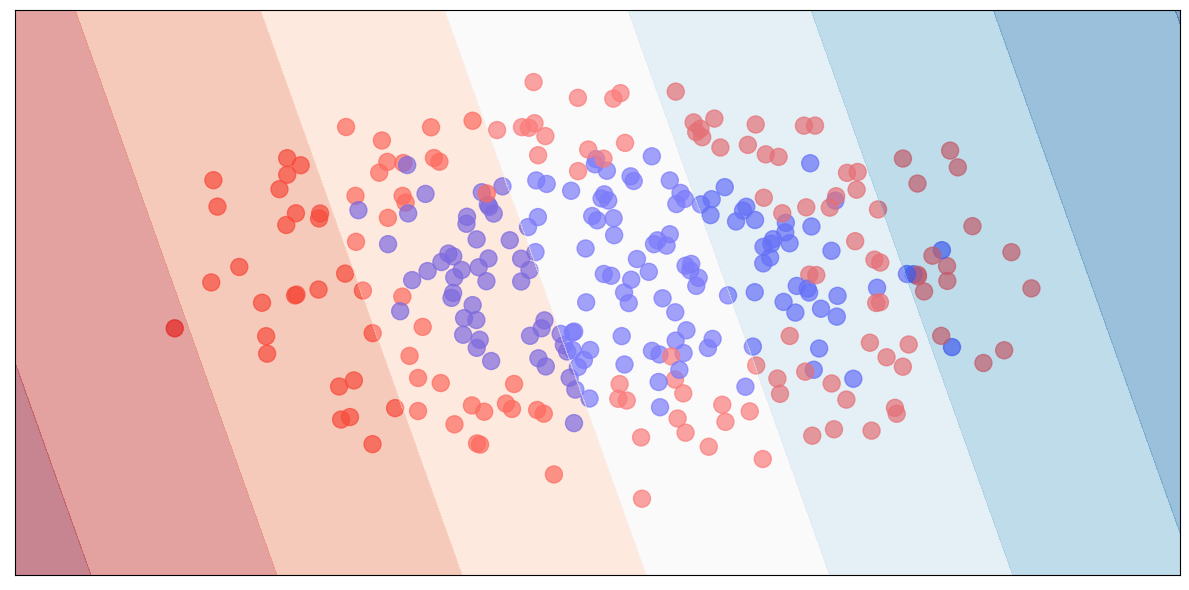

In [24]:
X,y = circles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,
                          batch_size=50,
                          l2_penalty=0.5
                          )
regr.fit(X_train, y_train)

regr.plot_cost()
print(regr.score(X_test, y_test), regr.score(X_train, y_train))
# regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X,y)

Использование небольшой L2 регуляризации даёт очень сильное ухудшение как функции потерь, так и метрик классификации. Кроме того, разделяющая окружность в этом случае смещается вправо и вверх: 

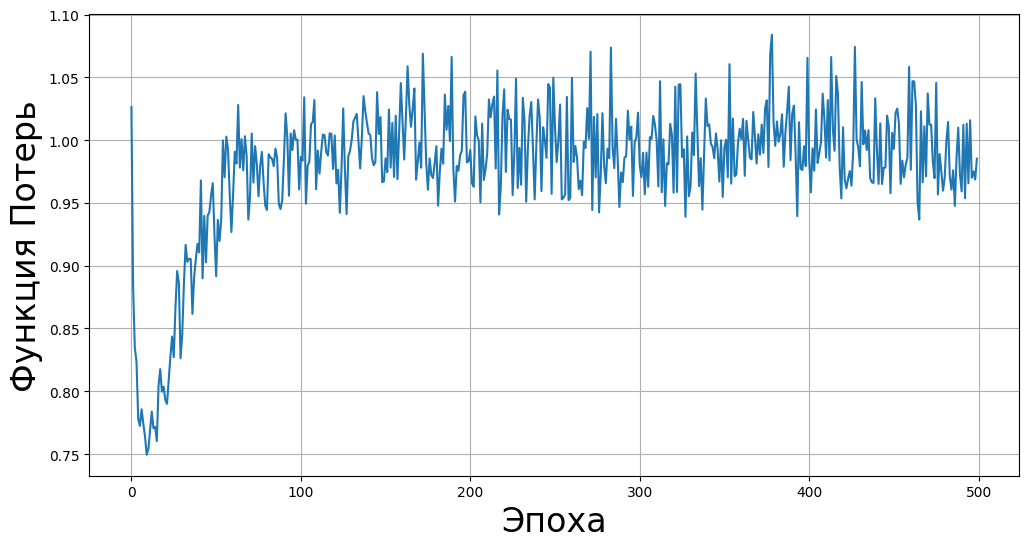

0.7555555555555555 0.7571428571428571
True Positives:0.7679	True Negatives:0.7353
False Positives:0.2321	False Negatives:0.2647
Accuracy:0.7556
Recall:0.8269	Precision:0.7679
f1 measure:0.7963


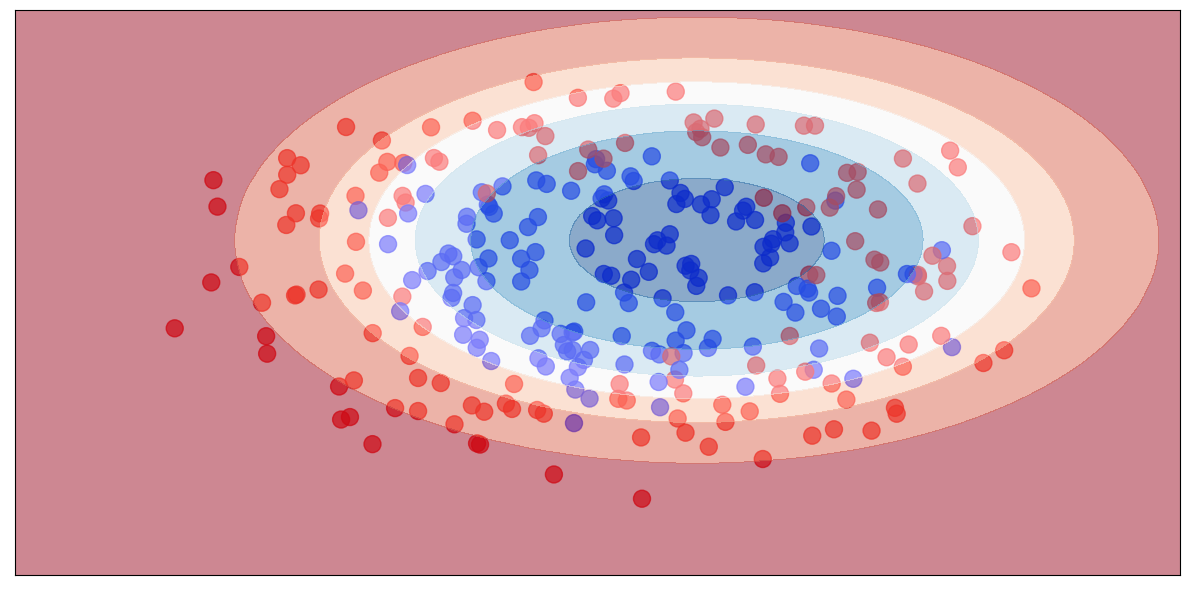

In [25]:
X,y = circles
order = 2
X_poly = to_polynom(X, order = order)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,
                          batch_size=50,
                          l2_penalty=0.05
                          )
regr.fit(X_train, y_train)

regr.plot_cost()
print(regr.score(X_test, y_test), regr.score(X_train, y_train))
regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X_poly,y,
                            poly = True, order = order)

При использовании L1 регуляризации как будто бы сильнее размывается граница между классами, при этом метрики ухудшаются очень значительно:

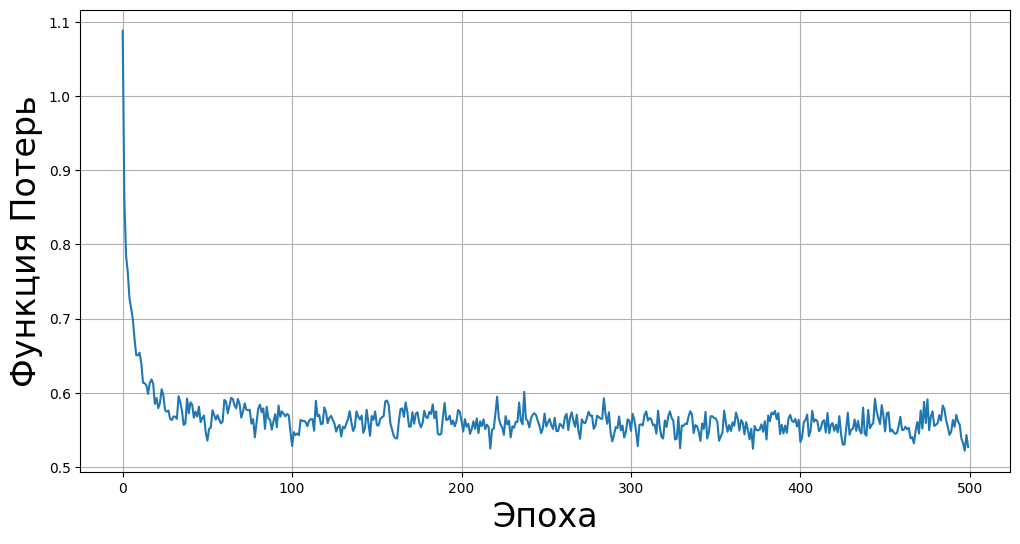

0.5 0.6190476190476191
True Positives:1.0000	True Negatives:0.4578
False Positives:0.0000	False Negatives:0.5422
Accuracy:0.5000
Recall:0.1346	Precision:1.0000
f1 measure:0.2373


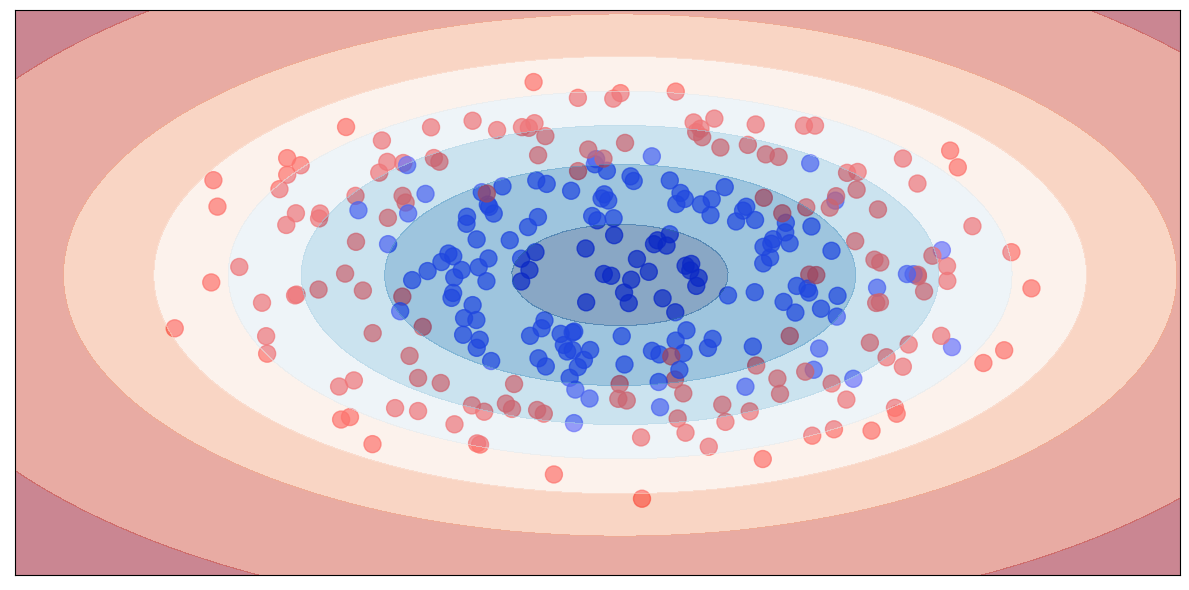

In [26]:
X,y = circles
order = 2
X_poly = to_polynom(X, order = order)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

regr = LogisticRegression(learning_rate=0.25,
                          epochs=500,
                          batch_size=50,
                          l1_penalty=0.1
                          )
regr.fit(X_train, y_train)

regr.plot_cost()
print(regr.score(X_test, y_test), regr.score(X_train, y_train))
regr.classification_report(X_test, y_test)
regr.plot_desicion_function(X_poly,y,
                            poly = True, order = order)

Мы видим, что полнота данных улетает вниз до 13%, при этом точность равна 100%. Из этого можно сделать вывод, что модель делает гигантское количество пропусков, игнорируя кучу данных, но при этом непроигнорированные значения определяет очень хорошо. На тестовых данных в этот раз справляется хуже, чем на тренировочных.

#### Вывод

В случае концентрических окружностей также лучше просто поиграться со степенями, регуляризации сильно ухудшают работу классификатора, ну а линейное разделение просто делит круги пополам.

### P.S.

Возможно, мне не стоило использовать такие высокие значения регуляризаций, тогда бы и значения функций потерь не улетали в космос, а метрики так драматически не снижались. Однако переделывать это я не буду, пусть будет показательным примером того, как чрезмерное использование регуляризаций может испортить регрессию.

# 2. Cars Moldova

*	 Используйте модель логистической регрессии для предсказания типа трансмиссии автомобилей на вторичном рынке Молдавии. Оцените модель на отложенной выборке. Проанализируйте метрики классификации.
*	Оцените влияние разных типов предварительной обработки на результат (использование стандартизации, нормализации или степенного преобразования для числовых признаков).
* Сравните результаты модели при использовании только числовых признаков и при добавлении категориальных признаков с помощью one-hot кодирования.
* Оцените наиболее значимые признаки для модели, проанализировав веса.

## 2.1. Обычный датасет

Прочитаем предобработанный датасет с закодированными с помощью чисел категориальными данными и сразу уберём столбец 'Year':

In [27]:
df = pd.read_csv('content/cars_moldova_cat_num.csv', delimiter = ',')
df = df.drop('Year', axis=1)
df

Make  Model  Style  Distance  Engine_capacity(cm3)  Fuel_type  \
0        40     92      4  195000.0                1800.0          2   
1        32     62     11  135000.0                1500.0          0   
2        32     71     11  110000.0                1500.0          0   
3        28     23     11  200000.0                1600.0          3   
4        23    124      5  300000.0                2200.0          0   
...     ...    ...    ...       ...                   ...        ...   
32069    42     88     10   88000.0                1800.0          4   
32070    19     53      3  225000.0                1800.0          3   
32071     6     77     11   89000.0                1500.0          0   
32072    22     10      1  370000.0                2000.0          0   
32073    32     62      6  300000.0                1500.0          0   

       Transmission  Price(euro)  Age       km_year  
0                 1       7750.0   11  17727.272727  
1                 0       8550.0    8  16875.000000  
2                 0       6550.0   10  11000.000000  
3                 0       4100.0   16  12500.000000  
4                 0       3490.0   22  13636.363636  
...             ...          ...  ...           ...  
32069             1      11500.0    6  14666.666667  
32070             0       4400.0   20  11250.000000  
32071             0       7000.0    7  12714.285714  
32072             0       4000.0   16  23125.000000  
32073             0       4000.0   16  18750.000000  

[32074 rows x 10 columns]

Выберем в качестве целевого класса трансмиссию и запишем данные для классификации. Сначала не будем использовать никакую предварительную обработку данных:

0         1       2       3             4
22446  19.0  240000.0  1896.0  4800.0  12631.578947
22447  14.0  233000.0  2500.0  7899.0  16642.857143
22448  16.0  286223.0  1800.0  5999.0  17888.937500
22449  16.0  291000.0  2000.0  4850.0  18187.500000
22450  39.0  290000.0   200.0  1000.0   7435.897436

C:\Users\argol\AppData\Local\Temp\ipykernel_28152\4184915714.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


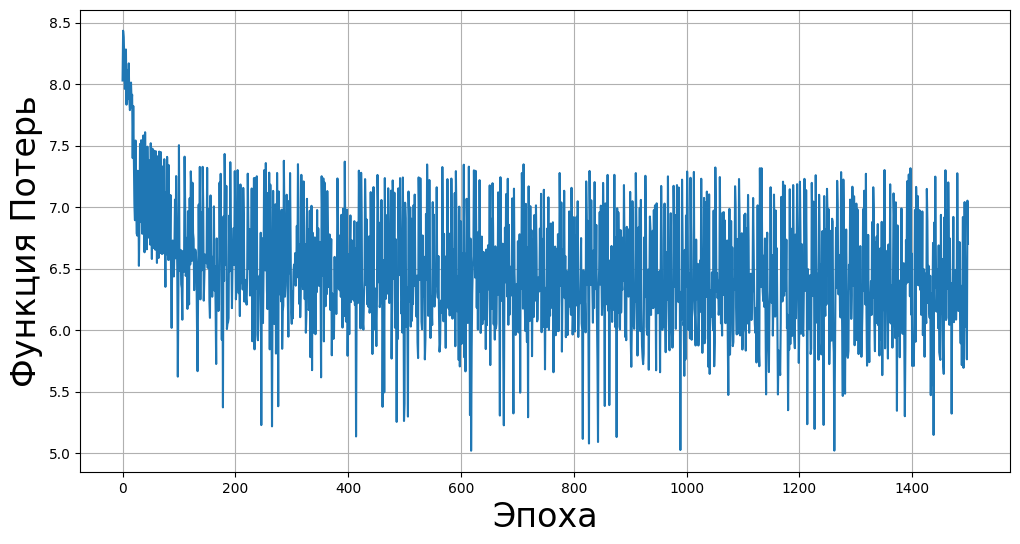

train Accuracy: 0.6401; test Accuracy: 0.6503
True Positives:0.8158	True Negatives:0.6175
False Positives:0.1842	False Negatives:0.3825
Accuracy:0.6503
Recall:0.2970	Precision:0.8158
f1 measure:0.4355


In [28]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
num_columns = ['Age', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

X = df[num_columns].values 
y = df["Transmission"].values 
features_names = df[num_columns].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

display(pd.DataFrame(X_train).tail())

regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

regr.fit(X_train, y_train)

regr.plot_cost()
print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))
regr.classification_report(X_test, y_test)

Метрики для сырых данных, откровенно говоря, выглядят так себе. Модель плохо справилась как с тестовыми данными, так и с тренировочными. Функцию потерь очень сильно шатает туда-сюда.

При этом мы видим неплохую точность модели, то есть *True Positives* определяются хорошо относительно *False Positives*, однако полнота данных очень низкая - модель пропускает много *True Positives*.

С весами тоже беда, сравнивать соответствующие им параметры между собой не представляется возможным, так как их шкалы не совподают:

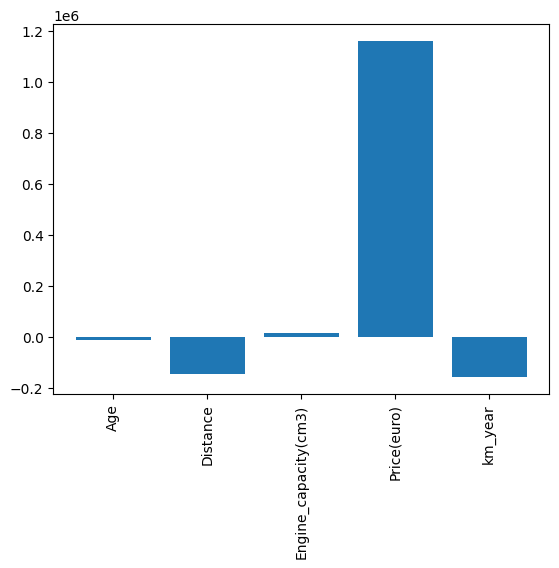

In [29]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 90);

### Вывод: **нам нужна предварительная обработка данных!**

## 2.2. Нормализованный датасет

Выполним предварителную нормализацию данных с помощью MinMaxScaler и посмотрим на результат:

0         1         2         3         4
22446  0.36  0.479896  0.353333  0.046092  0.251134
22447  0.26  0.465893  0.479167  0.077144  0.331520
22448  0.30  0.572360  0.333333  0.058106  0.356492
22449  0.30  0.581916  0.375000  0.046593  0.362475
22450  0.76  0.579916  0.000000  0.008016  0.147012

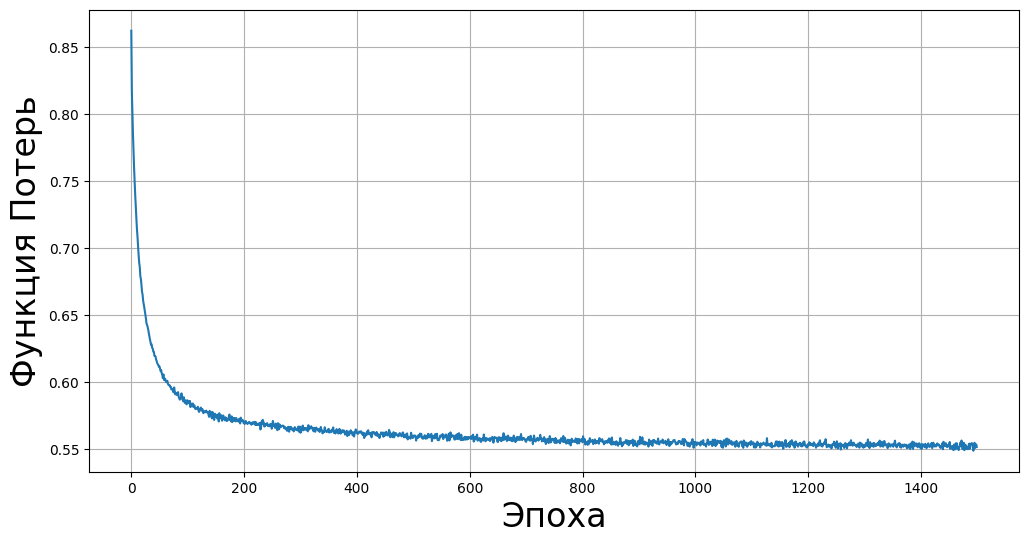

train Accuracy: 0.8086; test Accuracy: 0.8171
True Positives:0.8339	True Negatives:0.8056
False Positives:0.1661	False Negatives:0.1944
Accuracy:0.8171
Recall:0.7458	Precision:0.8339
f1 measure:0.7874


In [30]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
num_columns = ['Age', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

X = df[num_columns].values 
y = df["Transmission"].values 
features_names = df[num_columns].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 
display(pd.DataFrame(X_train).tail())

regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

regr.fit(X_train, y_train)

regr.plot_cost()
print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))
regr.classification_report(X_test, y_test)

Что ж, ситуация заметно улучшилась! :) 
Все метрики подросли до приемлемых значений.

Видим, что Accuracy для тестовой выборки несколько выше, чем для оставшейся тренировочной. Также видим, что точность модели увеличилась незначительно, при этом полнота подросла более чем в два раза, то есть модель стала меньше пропускать *True Positives*.

Теперь мы можем проводить анализ весов, так как с помощью нормализации мы перевели показатели в одну шкалу. Наибольшее влияние на предположение о типе трансмиссии вносят цена, объем двигателя и возраст, а показатели, связанные с дистанцией почти не влияют:

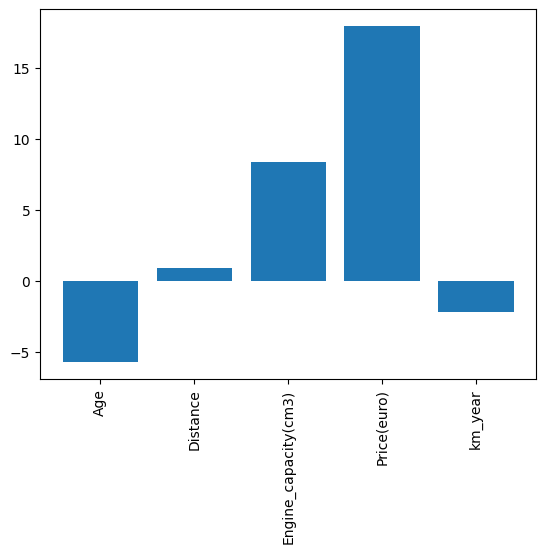

In [31]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 90);

### Выводы:

* Чем больше цена и/или объем двигателя, тем с большей вероятностью тип трансмиссии будет автоматическим.
* Чем выше возраст, тем с большей вероятностью тип трансмиссии будет ручным.

## 2.3. Стандартизованный датасет

Воспользуемся стандартизацией в качестве предобработки:

0         1         2         3         4
22446  0.741632  0.650045  0.048502 -0.492578 -0.316457
22447  0.044707  0.572938  1.036807 -0.162001  0.234820
22448  0.323477  1.159206 -0.108579 -0.364678  0.406070
22449  0.323477  1.211826  0.218674 -0.487244  0.447102
22450  3.529335  1.200811 -2.726606 -0.897931 -1.030507

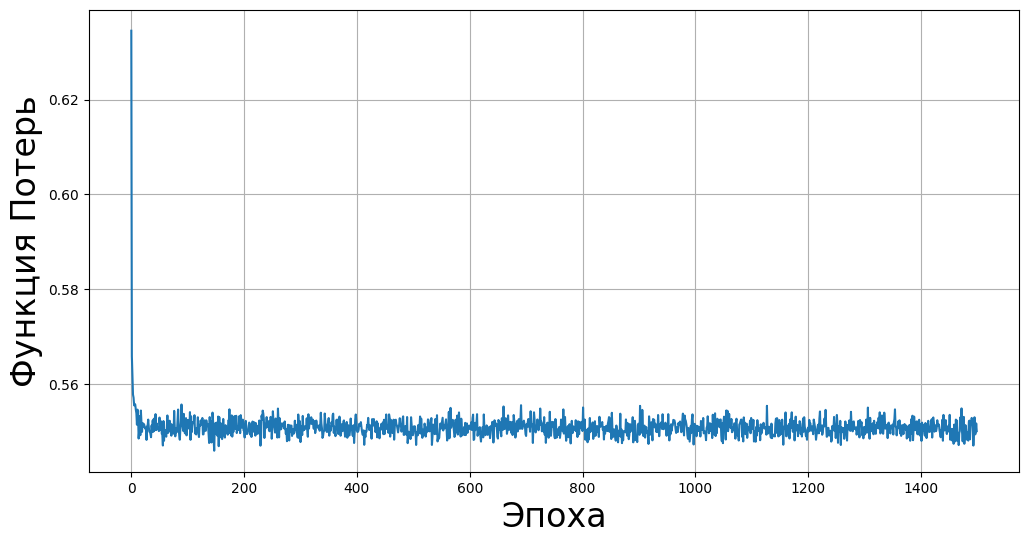

train Accuracy: 0.8078; test Accuracy: 0.8163
True Positives:0.8321	True Negatives:0.8054
False Positives:0.1679	False Negatives:0.1946
Accuracy:0.8163
Recall:0.7460	Precision:0.8321
f1 measure:0.7867


In [32]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
num_columns = ['Age', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

X = df[num_columns].values 
y = df["Transmission"].values 
features_names = df[num_columns].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 
display(pd.DataFrame(X_train).tail())

regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

regr.fit(X_train, y_train)

regr.plot_cost()
print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))
regr.classification_report(X_test, y_test)

Видим, что при использовании стандартизации функция потерь вышла на плато значительно быстрее, чем при нормализации, однако какого-то выигрыша по метрикам это не принесло.

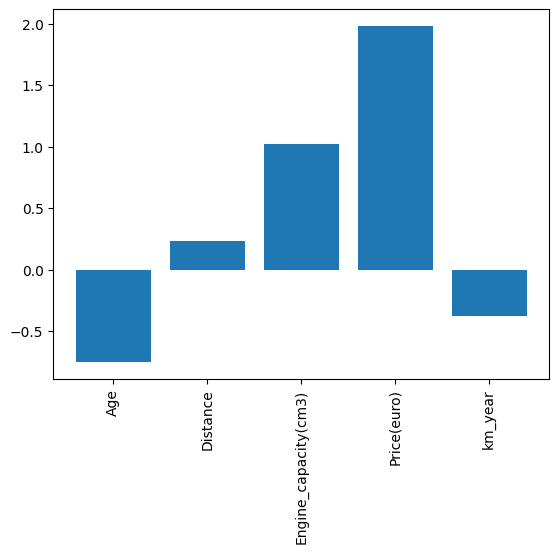

In [33]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 90);

Веса выглядят плюс минус также, поменялась только размерность их значений. Выводы можно сделать те же, что и при нормализации.

## 2.3. Датасет со степенным преобразованием
Воспользуемся степенным преобразованием и проверим, как работает модель:

0         1         2         3         4
22446  0.841800  0.673008  0.107037 -0.363168 -0.243078
22447  0.229766  0.602609  1.045840  0.190641  0.297377
22448  0.490934  1.127195 -0.051343 -0.118242  0.457894
22449  0.490934  1.173168  0.275462 -0.351890  0.495906
22450  2.499464  1.163558 -3.562375 -1.957367 -1.019206

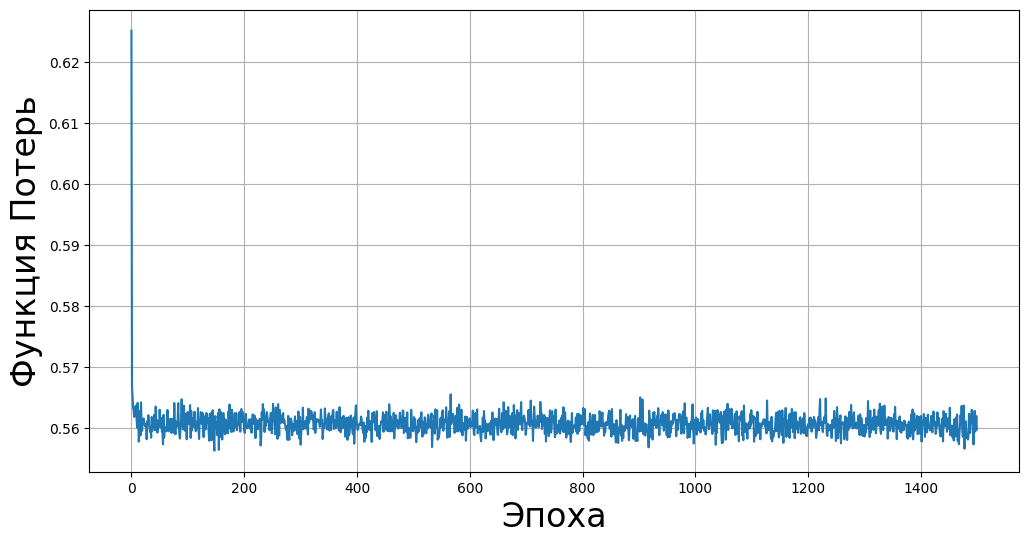

train Accuracy: 0.8026; test Accuracy: 0.8111
True Positives:0.8106	True Negatives:0.8114
False Positives:0.1894	False Negatives:0.1886
Accuracy:0.8111
Recall:0.7620	Precision:0.8106
f1 measure:0.7856


In [34]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
num_columns = ['Age', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

X = df[num_columns].values 
y = df["Transmission"].values 
features_names = df[num_columns].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = PowerTransformer()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 
display(pd.DataFrame(X_train).tail())

regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

regr.fit(X_train, y_train)

regr.plot_cost()
print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))
regr.classification_report(X_test, y_test)

Метрики изменились незначительно. Функция потерь также очень быстро вышла на плато.

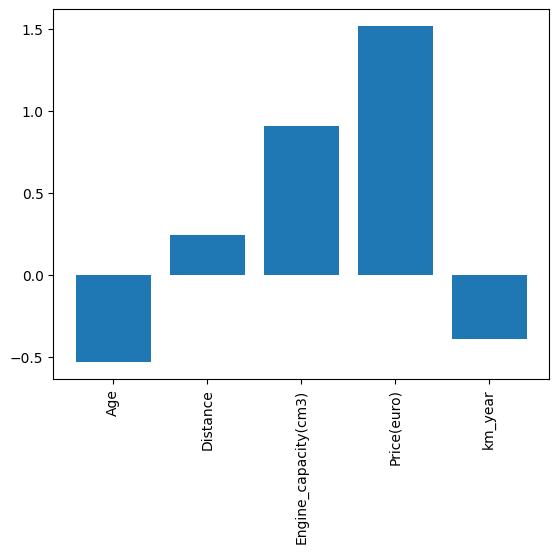

In [35]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 90);

Веса остались плюс-минус те же, выводы аналогичные.

## 2.4. Датасет с OHE

Загрузим датасет с предварительно проведенным One-Hot преобразованием столбца **Style**, переведем значения столбца **Transmission** в числовые (0 - ручная, 1 - автоматическая) и удалим столбец **Year**:

In [36]:
df_3_dummies_style = pd.read_csv('content/cars_moldova_df3_dummies_style.csv')
df_3_dummies_style = df_3_dummies_style.drop('Year', axis=1)
df_3_dummies_style['Transmission'] = df_3_dummies_style['Transmission'].apply(lambda x: 1 if x == 'Automatic' else 0)
df_3_dummies_style

Make         Model      Style  Distance  Engine_capacity(cm3)  \
0          Toyota         Prius  Hatchback  195000.0                1800.0   
1         Renault  Grand Scenic  Universal  135000.0                1500.0   
2         Renault        Laguna  Universal  110000.0                1500.0   
3            Opel         Astra  Universal  200000.0                1600.0   
4        Mercedes          Vito   Microvan  300000.0                2200.0   
...           ...           ...        ...       ...                   ...   
32069  Volkswagen        Passat      Sedan   88000.0                1800.0   
32070  Land Rover    Freelander  Crossover  225000.0                1800.0   
32071       Dacia     Logan Mcv  Universal   89000.0                1500.0   
32072       Mazda             6      Combi  370000.0                2000.0   
32073     Renault  Grand Scenic    Minivan  300000.0                1500.0   

          Fuel_type  Transmission  Price(euro)  Age  km_year  ... Style_Coupe  \
0            Hybrid             1       7750.0   11  17727.0  ...           0   
1            Diesel             0       8550.0    8  16875.0  ...           0   
2            Diesel             0       6550.0   10  11000.0  ...           0   
3      Metan/Propan             0       4100.0   16  12500.0  ...           0   
4            Diesel             0       3490.0   22  13636.0  ...           0   
...             ...           ...          ...  ...      ...  ...         ...   
32069        Petrol             1      11500.0    6  14667.0  ...           0   
32070  Metan/Propan             0       4400.0   20  11250.0  ...           0   
32071        Diesel             0       7000.0    7  12714.0  ...           0   
32072        Diesel             0       4000.0   16  23125.0  ...           0   
32073        Diesel             0       4000.0   16  18750.0  ...           0   

      Style_Crossover Style_Hatchback  Style_Microvan  Style_Minivan  \
0                   0               1               0              0   
1                   0               0               0              0   
2                   0               0               0              0   
3                   0               0               0              0   
4                   0               0               1              0   
...               ...             ...             ...            ...   
32069               0               0               0              0   
32070               1               0               0              0   
32071               0               0               0              0   
32072               0               0               0              0   
32073               0               0               0              1   

       Style_Pickup  Style_Roadster  Style_SUV  Style_Sedan  Style_Universal  
0                 0               0          0            0                0  
1                 0               0          0            0                1  
2                 0               0          0            0                1  
3                 0               0          0            0                1  
4                 0               0          0            0                0  
...             ...             ...        ...          ...              ...  
32069             0               0          0            1                0  
32070             0               0          0            0                0  
32071             0               0          0            0                1  
32072             0               0          0            0                0  
32073             0               0          0            0                0  

[32074 rows x 26 columns]

В качестве предварительной обработки используем нормализацию:

0         1         2     3         4        5    6    7    8   \
22446  0.479896  0.353333  0.046092  0.36  0.251142  0.04000  0.0  0.0  0.0   
22447  0.465893  0.479167  0.077144  0.26  0.331523  0.02360  0.0  0.0  0.0   
22448  0.572360  0.333333  0.058106  0.30  0.356493  0.03816  0.0  0.0  0.0   
22449  0.581916  0.375000  0.046593  0.30  0.362485  0.04800  0.0  0.0  0.0   
22450  0.579916  0.000000  0.008016  0.76  0.147014  0.23200  0.0  0.0  0.0   

        9    10   11   12   13   14   15   16   17  
22446  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
22447  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
22448  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
22449  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
22450  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0

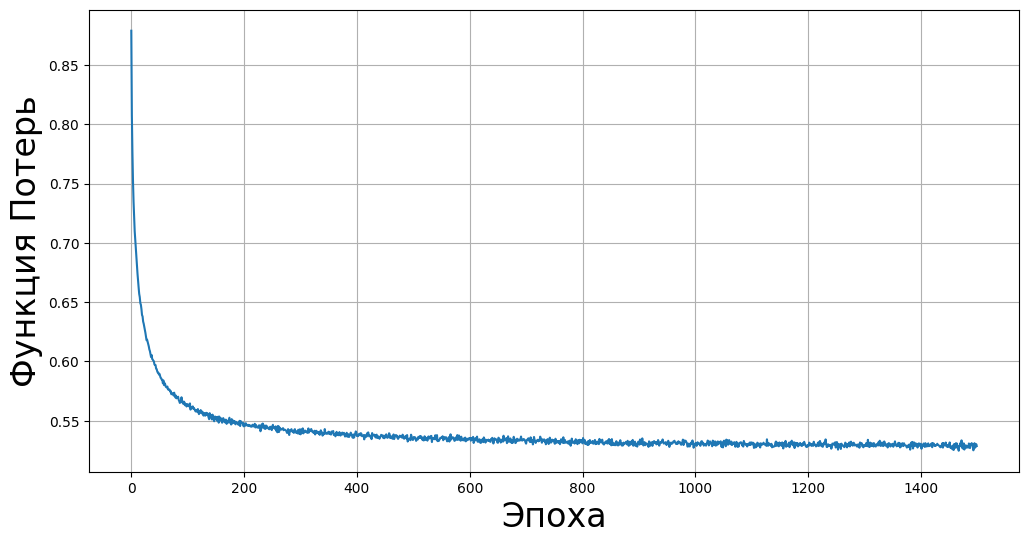

train Accuracy: 0.8181; test Accuracy: 0.8271
True Positives:0.8371	True Negatives:0.8199
False Positives:0.1629	False Negatives:0.1801
Accuracy:0.8271
Recall:0.7689	Precision:0.8371
f1 measure:0.8015


In [37]:
df_3_dummies_style_num = df_3_dummies_style.select_dtypes(['number'])
df_3_dummies_style_object = df_3_dummies_style.select_dtypes(['object'])

X, y = df_3_dummies_style_num.drop(columns = ['Transmission']).values, df_3_dummies_style_num['Transmission'].values

features_names = df_3_dummies_style_num.drop(columns = ['Transmission']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 
display(pd.DataFrame(X_train).tail())

regr = LogisticRegression(learning_rate=0.8,epochs=1500,batch_size=5000)

regr.fit(X_train, y_train)

regr.plot_cost()
print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))
regr.classification_report(X_test, y_test)

При добавлении новых столбцов все метрики немножечко улучшились, но не значительно.

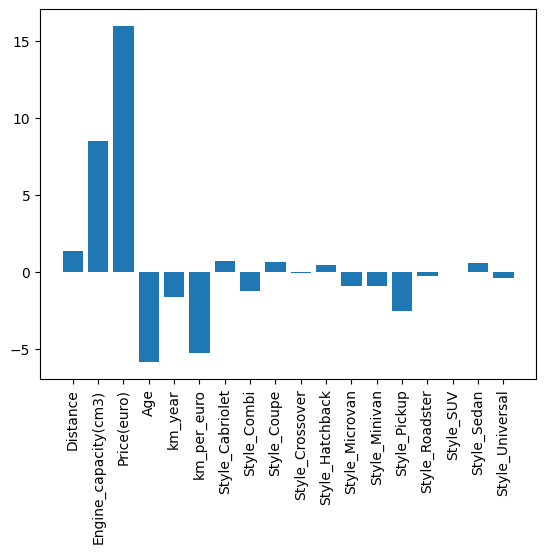

In [38]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 90);

Основные веса и закономерности остались прежними. Из OHE столбцов наибольший вклад вносят пикапы.

## Выводы:

* Чем больше цена и/или объем двигателя, тем с большей вероятностью тип трансмиссии будет автоматическим.
* Чем выше возраст автомобиля, тем с большей вероятностью тип трансмиссии будет ручным.
* Как правило Accuracy модели на тестовых данных несколько выше, чем на тренировочных (буквально на 1 процентный пункт).
* Нормализация, стандартизация и степенное преобразование влияют на метрики классификации похожим образом, улучшая показатели примерно до одного уровня (~80%).
* OHE несколько улучшает метрики классификации, но не очень сильно (буквально на 1 процентный пункт). Данные были нормализованы и сравнение проводилось для нормализованных данных без OHE.

На этом, пожалуй, всё.
До встречи в следующих эпизодах! =)